## This script runs auto ARIMA on the average temperature and food prices univariate time series, fits the model on the training set and uses the model to forecast the validation set for each country (for initial modeling)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pmdarima as pm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from my_functions import stationary_check, plot_acf_pacf

In [11]:
df_orig = pd.read_csv('.\Market_food_prices_w_temp_reduced.csv')
country_dict = dict(zip(df_orig.country_id,df_orig.country))
plt.rcParams["figure.figsize"] = [16, 12]

text_file1 = open("./plot-auto-arima/init/Auto-ARIMA_modeling_summary.doc", "w")

Fitting using Auto-ARIMA for food price

In [12]:
def auto_arima_prices(df_country, value):
    plt.figure()
    df_prices = df_country.groupby('period')['price_in_USD'].mean().reset_index()
    df_prices.set_index('period', inplace=True)
    df_prices=df_prices.sort_index()
    X = df_prices

    X = X.sort_values(by='period')

    #get dynamic size of split based on time series
    init = int(len(X) * 0.75) #get the 75% first
    if (init%12==0):          #check if it has the full year
        size = init
    else:
        size = int(init/12)*12 + 12 #calculate the next full year split

    train, valid = X[0:size], X[size:len(X)]

    plot_acf_pacf(train, value, '/plot-auto-arima/init/foodprices')

    print('summary using auto-ARIMA for prices...')
    print('Auto-ARIMA results for food prices', file=text_file1)
    model = pm.auto_arima(train, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          start_P=0,
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

    print(model.summary(), file=text_file1)
    model.fit(train)

    forecast = model.predict(n_periods=len(valid))
    forecast = pd.DataFrame(forecast, index=valid.index, columns=['Prediction'])

    plt.figure()
    plt.plot(train, label='Train', color='blue')
    plt.plot(valid, label='Test', color='seagreen')
    plt.plot(forecast, label='Prediction', color='red')
    plt.title('Auto Arima Modeling')
    plt.xlabel('period')
    plt.ylabel('food prices')
    plt.legend()
    fig = plt.gcf()
    fig.savefig('./plot-auto-arima/init/foodprices/pred/'+ value + '.png')

    #calculate rmse
    rms = sqrt(mean_squared_error(valid, forecast))
    print('RMSE: ' + str(rms), file=text_file1)
    print('='*70, file=text_file1)

Fitting using Auto-ARIMA for avg temp

In [13]:
def auto_arima_temp(df_country, value):
    plt.figure()
    df_temp = df_country.groupby('period')['avg_temp'].mean().reset_index()
    df_temp.set_index('period', inplace=True)
    df_temp=df_temp.sort_index()
    X = df_temp

    X = X.sort_values(by='period')

    #get dynamic size of split based on time series
    init = int(len(X) * 0.75) #get the 75% first
    if (init%12==0):          #check if it has the full year
        size = init
    else:
        size = int(init/12)*12 + 12 #calculate the next full year split

    train, valid = X[0:size], X[size:len(X)]

    plot_acf_pacf(train, value, '/plot-auto-arima/init/avgtemp')

    print('summary using auto-ARIMA for avg_temp...')
    print('Auto-ARIMA results for avg_temp', file=text_file1)

    model = pm.auto_arima(train, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          start_P=0,
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

    print(model.summary(), file=text_file1)
    model.fit(train)

    forecast = model.predict(n_periods=len(valid))
    forecast = pd.DataFrame(forecast, index=valid.index, columns=['Prediction'])

    plt.figure()
    plt.plot(train, label='Train', color='blue')
    plt.plot(valid, label='Test', color='seagreen')
    plt.plot(forecast, label='Prediction', color='red')
    plt.title('Auto Arima Modeling')
    plt.xlabel('period')
    plt.ylabel('avg temp')
    plt.legend()
    fig = plt.gcf()
    fig.savefig('./plot-auto-arima/init/avgtemp/pred/'+ value + '.png')

    #calculate rmse
    rms = sqrt(mean_squared_error(valid, forecast))
    print('RMSE: ' + str(rms), file=text_file1)
    print('-'*70, file=text_file1)

Bangladesh
summary using auto-ARIMA for avg_temp...
Fit ARIMA: order=(1, 0, 1); AIC=395.068, BIC=405.326, Fit time=0.048 seconds
Fit ARIMA: order=(0, 0, 0); AIC=526.086, BIC=531.215, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=441.650, BIC=449.343, Fit time=0.016 seconds
Fit ARIMA: order=(0, 0, 1); AIC=437.021, BIC=444.714, Fit time=0.016 seconds
Fit ARIMA: order=(2, 0, 1); AIC=355.614, BIC=368.436, Fit time=0.104 seconds
Fit ARIMA: order=(2, 0, 0); AIC=361.402, BIC=371.659, Fit time=0.032 seconds
Fit ARIMA: order=(2, 0, 2); AIC=340.537, BIC=355.923, Fit time=0.240 seconds
Fit ARIMA: order=(3, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 2); AIC=379.462, BIC=392.284, Fit time=0.064 seconds
Fit ARIMA: order=(3, 0, 2); AIC=342.078, BIC=360.028, Fit time=0.296 seconds
Fit ARIMA: order=(2, 0, 3); AIC=336.641, BIC=354.592, Fit time=0.240 seconds
Fit ARIMA: order=(1, 0, 3); AIC=389.195, BIC=404.581, Fit time=0.340 seconds
Total fit time: 1.420 seconds
summ

Fit ARIMA: order=(3, 0, 2); AIC=362.208, BIC=380.158, Fit time=0.152 seconds
Fit ARIMA: order=(2, 0, 3); AIC=359.901, BIC=377.851, Fit time=0.176 seconds
Fit ARIMA: order=(1, 0, 3); AIC=381.820, BIC=397.206, Fit time=0.256 seconds
Total fit time: 1.276 seconds
summary using auto-ARIMA for prices...
Fit ARIMA: order=(1, 1, 1); AIC=-406.216, BIC=-396.000, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-409.373, BIC=-404.265, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-408.215, BIC=-400.554, Fit time=0.024 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-408.208, BIC=-400.547, Fit time=0.024 seconds
Total fit time: 0.160 seconds
Costa Rica
summary using auto-ARIMA for avg_temp...
Fit ARIMA: order=(1, 0, 1); AIC=95.441, BIC=103.818, Fit time=0.036 seconds
Fit ARIMA: order=(0, 0, 0); AIC=144.542, BIC=148.731, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=100.814, BIC=107.097, Fit time=0.020 seconds
Fit ARIMA: order=(0, 0, 1); AIC=105.039, BIC=111.322, Fit time=0.024 sec

Fit ARIMA: order=(2, 1, 3); AIC=-246.295, BIC=-231.752, Fit time=0.292 seconds
Total fit time: 0.912 seconds
Kenya
summary using auto-ARIMA for avg_temp...
Fit ARIMA: order=(1, 0, 1); AIC=130.079, BIC=139.186, Fit time=0.044 seconds
Fit ARIMA: order=(0, 0, 0); AIC=208.770, BIC=213.323, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=148.574, BIC=155.404, Fit time=0.012 seconds
Fit ARIMA: order=(0, 0, 1); AIC=152.105, BIC=158.935, Fit time=0.016 seconds
Fit ARIMA: order=(2, 0, 1); AIC=117.884, BIC=129.267, Fit time=0.076 seconds
Fit ARIMA: order=(2, 0, 0); AIC=120.706, BIC=129.812, Fit time=0.036 seconds
Fit ARIMA: order=(2, 0, 2); AIC=116.826, BIC=130.486, Fit time=0.092 seconds
Fit ARIMA: order=(3, 0, 3); AIC=107.999, BIC=126.213, Fit time=3.717 seconds
Fit ARIMA: order=(2, 0, 3); AIC=106.863, BIC=122.799, Fit time=0.976 seconds
Fit ARIMA: order=(1, 0, 2); AIC=129.591, BIC=140.974, Fit time=0.048 seconds
Fit ARIMA: order=(1, 0, 3); AIC=129.413, BIC=143.073, Fit time=0.080 secon

Fit ARIMA: order=(3, 1, 1); AIC=-939.019, BIC=-919.894, Fit time=0.360 seconds
Fit ARIMA: order=(3, 1, 0); AIC=-929.530, BIC=-913.593, Fit time=0.100 seconds
Fit ARIMA: order=(3, 1, 2); AIC=-937.846, BIC=-915.534, Fit time=0.472 seconds
Total fit time: 1.292 seconds
Peru
summary using auto-ARIMA for avg_temp...
Fit ARIMA: order=(1, 0, 1); AIC=82.818, BIC=91.924, Fit time=0.036 seconds
Fit ARIMA: order=(0, 0, 0); AIC=151.088, BIC=155.641, Fit time=0.000 seconds
Fit ARIMA: order=(1, 0, 0); AIC=93.336, BIC=100.166, Fit time=0.020 seconds
Fit ARIMA: order=(0, 0, 1); AIC=97.627, BIC=104.457, Fit time=0.016 seconds
Fit ARIMA: order=(2, 0, 1); AIC=77.323, BIC=88.707, Fit time=0.060 seconds
Fit ARIMA: order=(2, 0, 0); AIC=77.415, BIC=86.521, Fit time=0.028 seconds
Fit ARIMA: order=(2, 0, 2); AIC=78.696, BIC=92.356, Fit time=0.084 seconds
Fit ARIMA: order=(3, 0, 2); AIC=79.513, BIC=95.450, Fit time=0.152 seconds
Fit ARIMA: order=(3, 0, 1); AIC=78.789, BIC=92.449, Fit time=0.156 seconds
Total fi

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

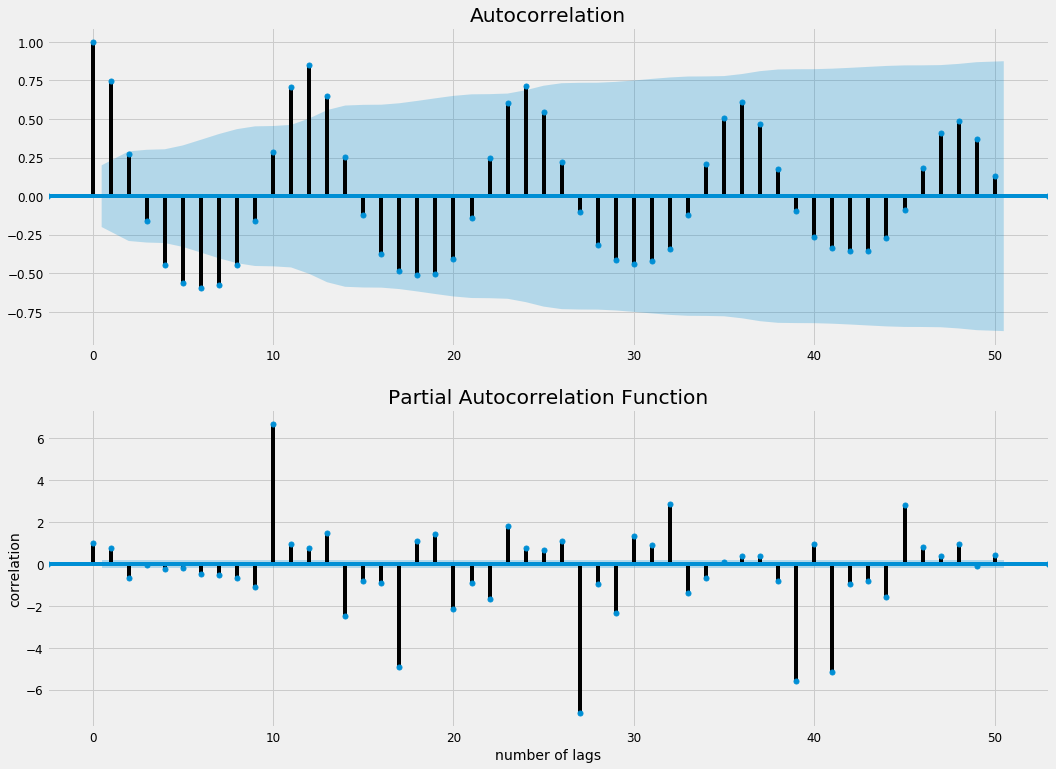

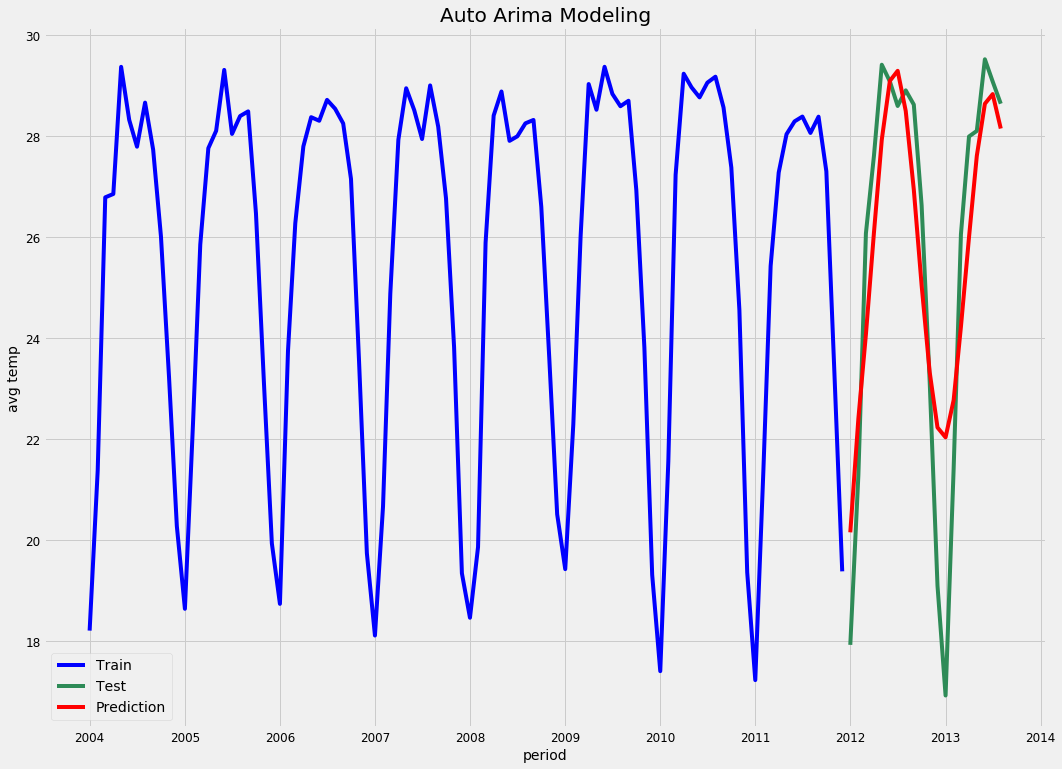

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

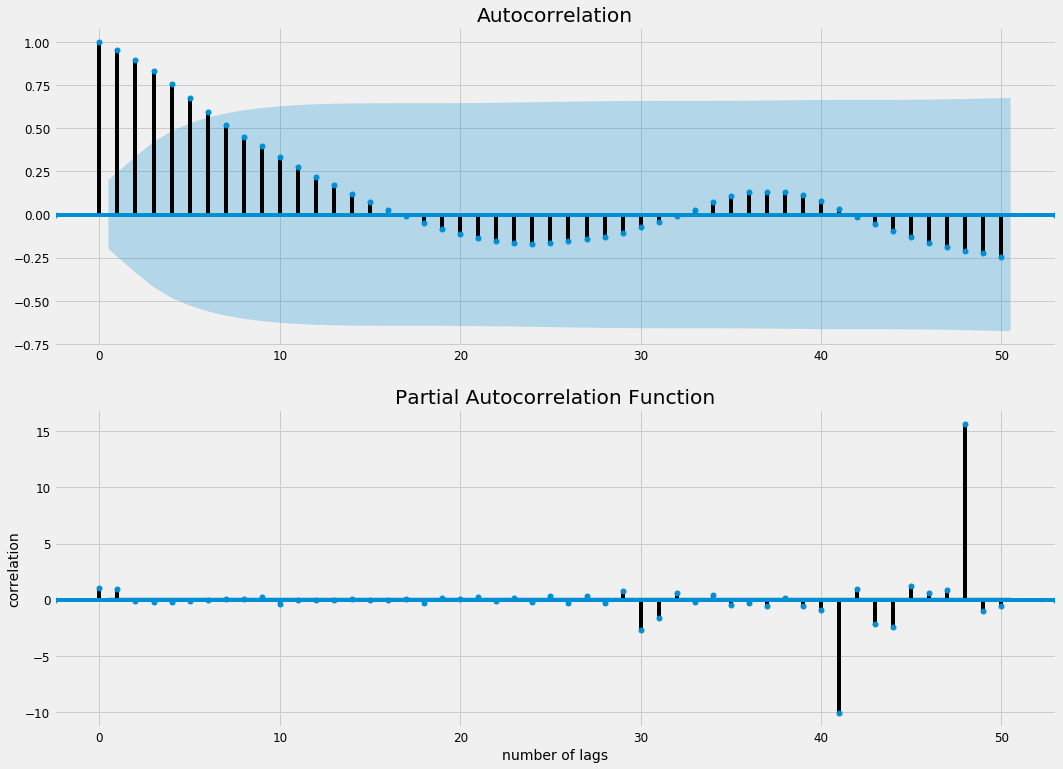

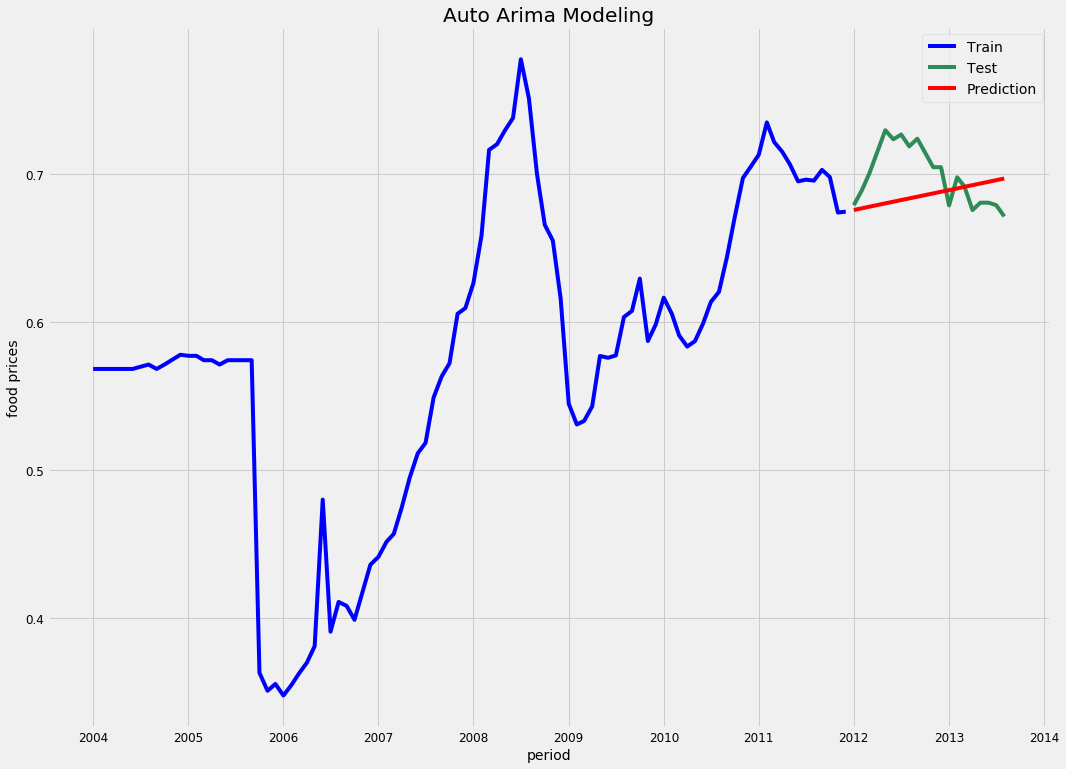

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

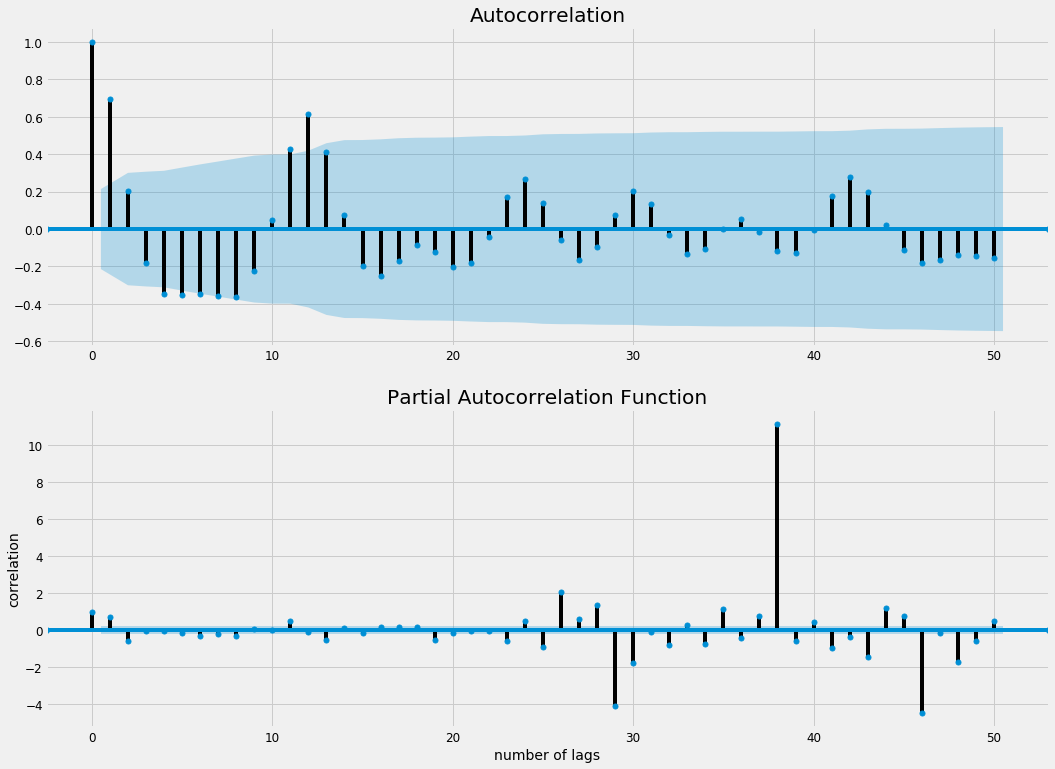

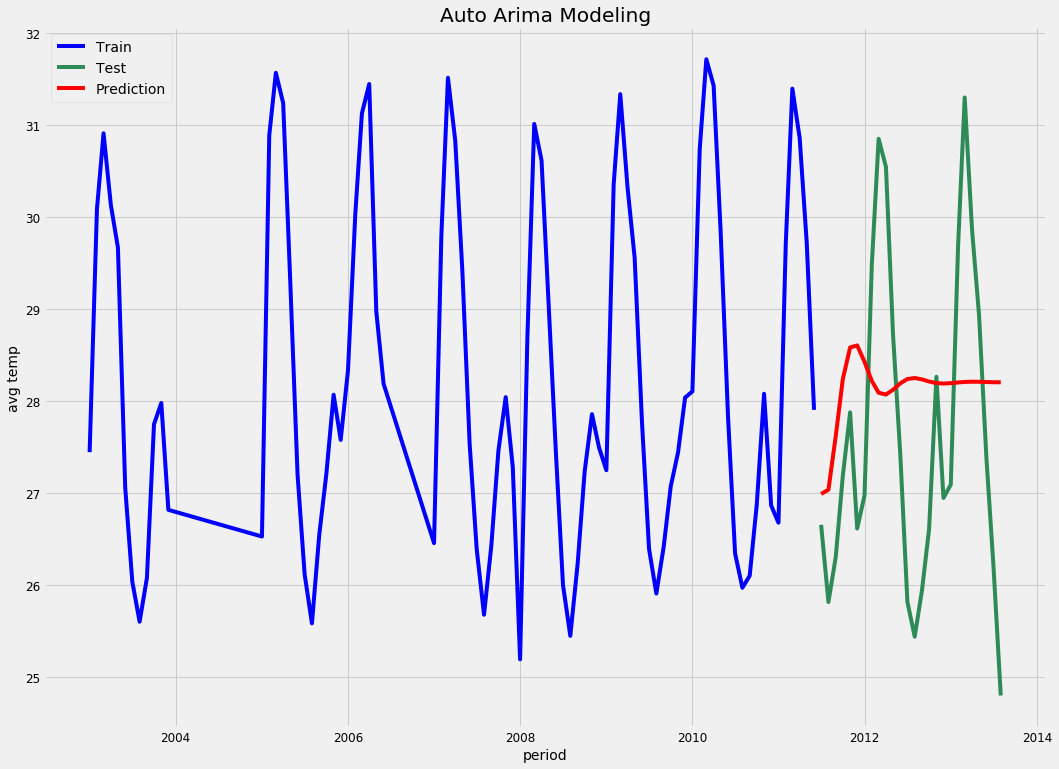

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

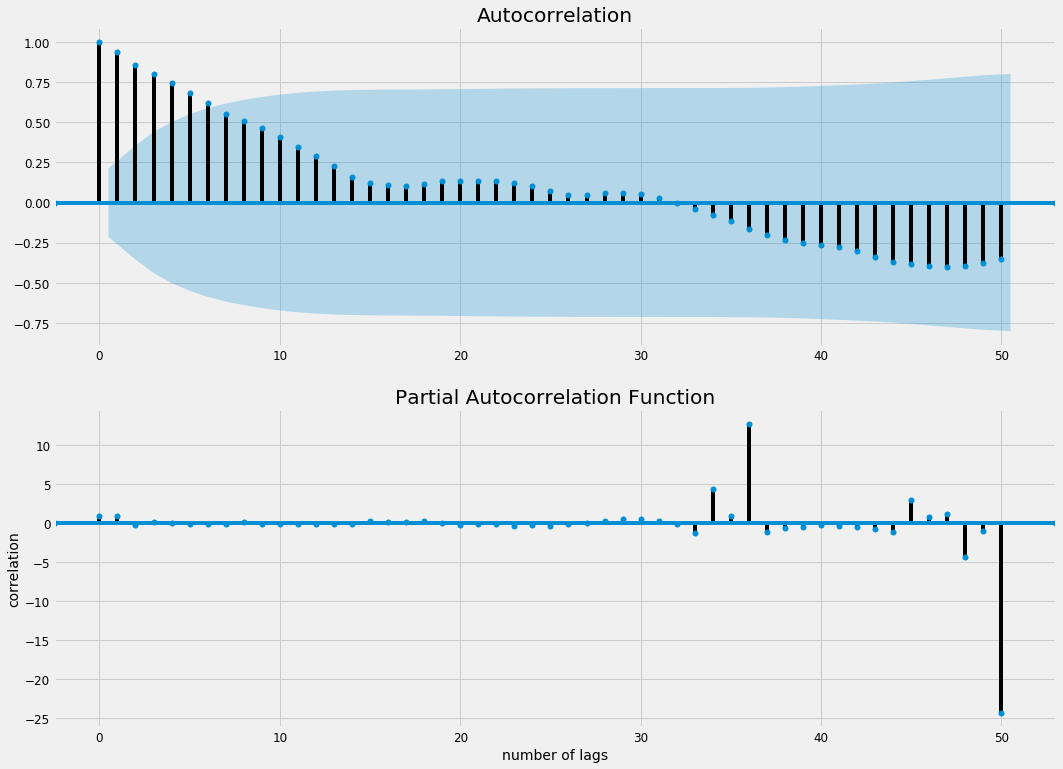

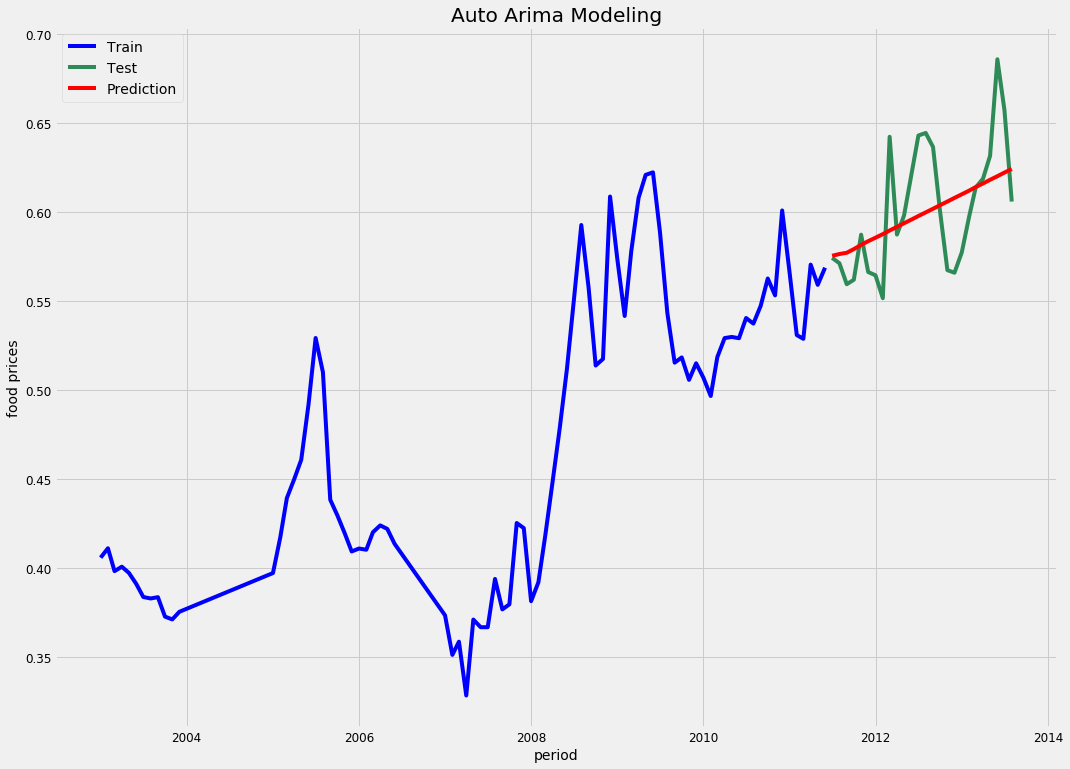

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

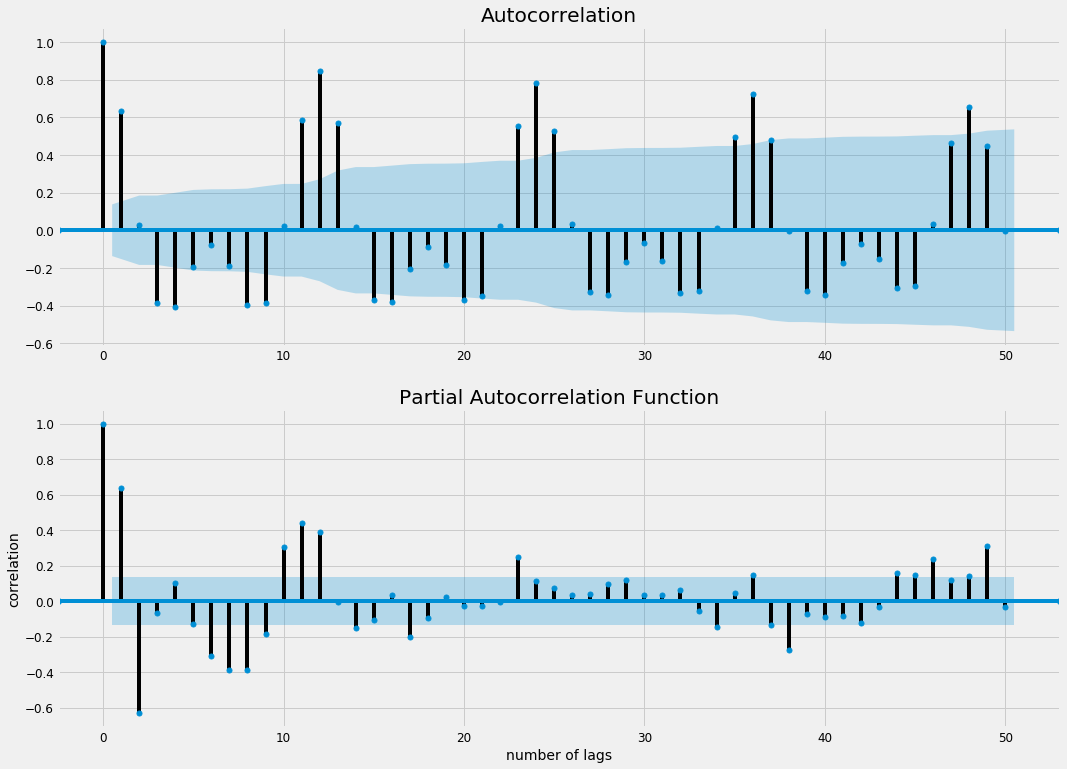

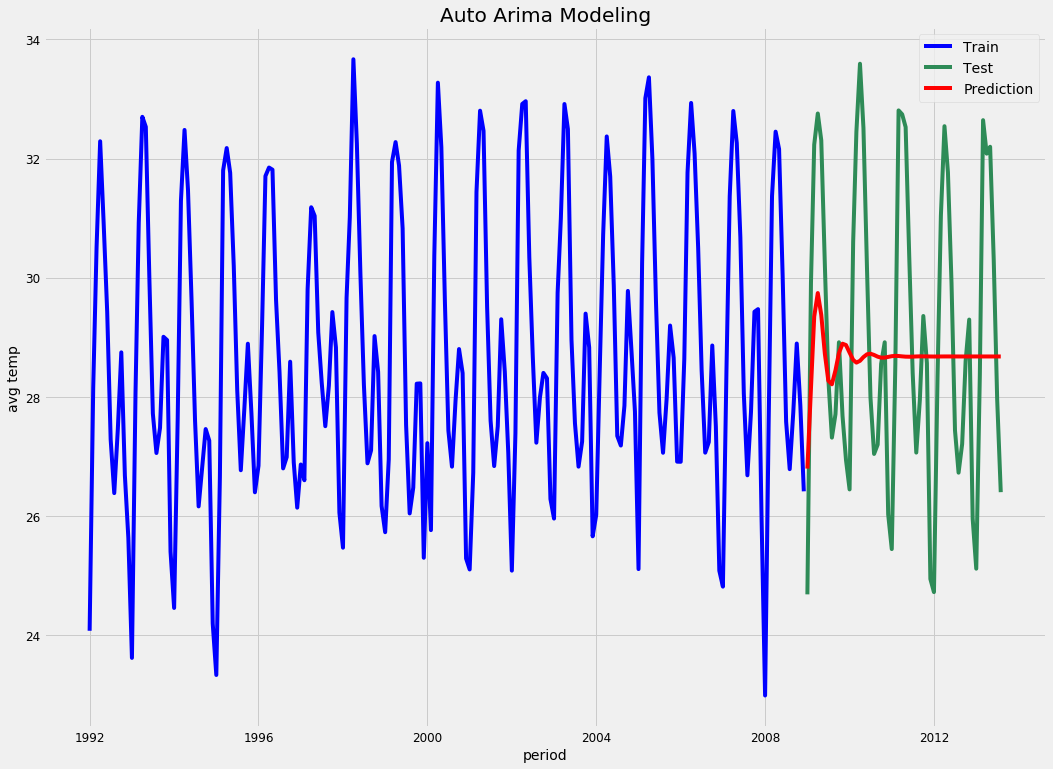

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

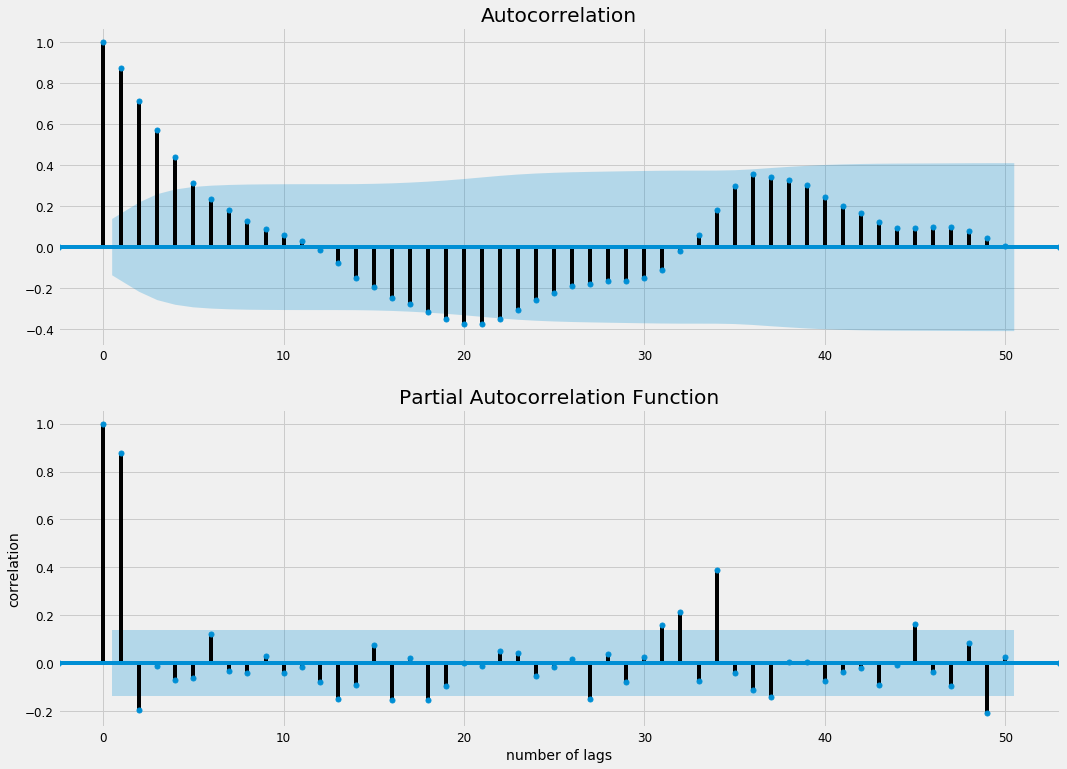

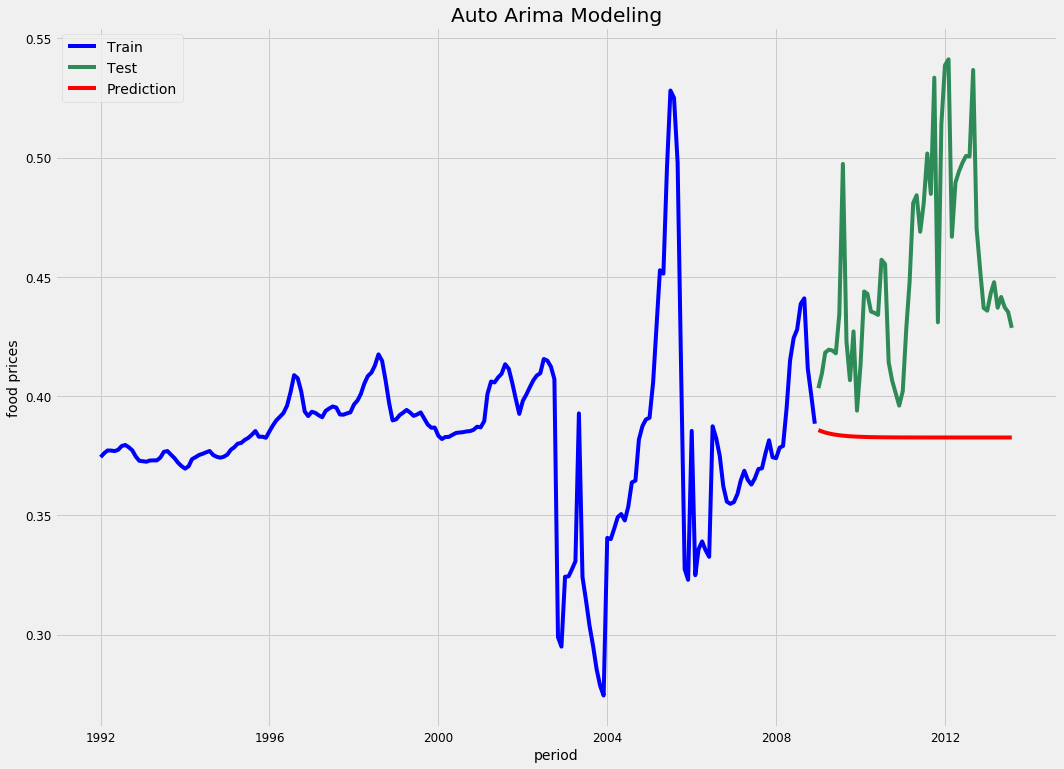

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

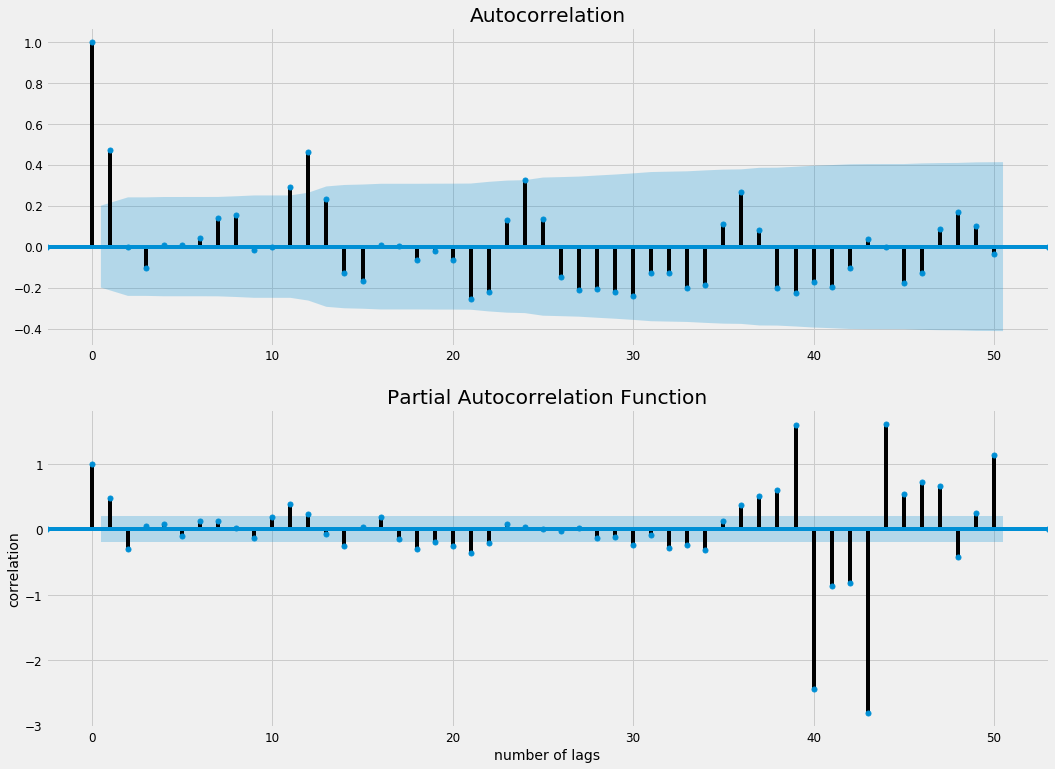

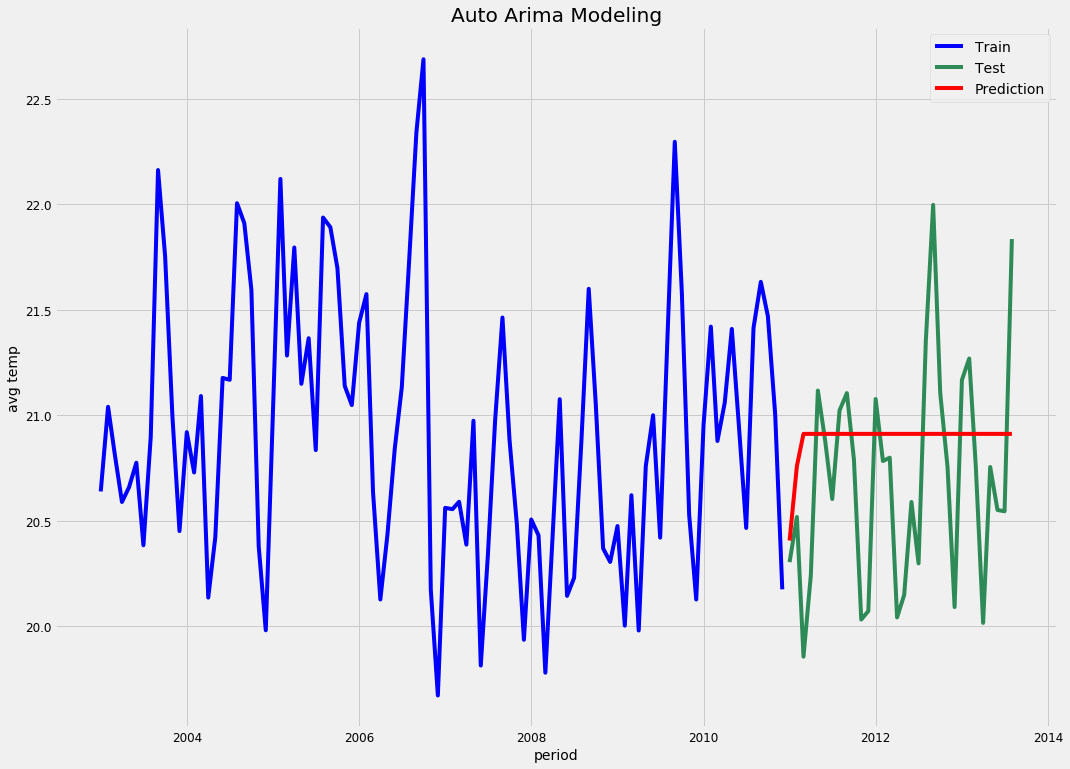

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

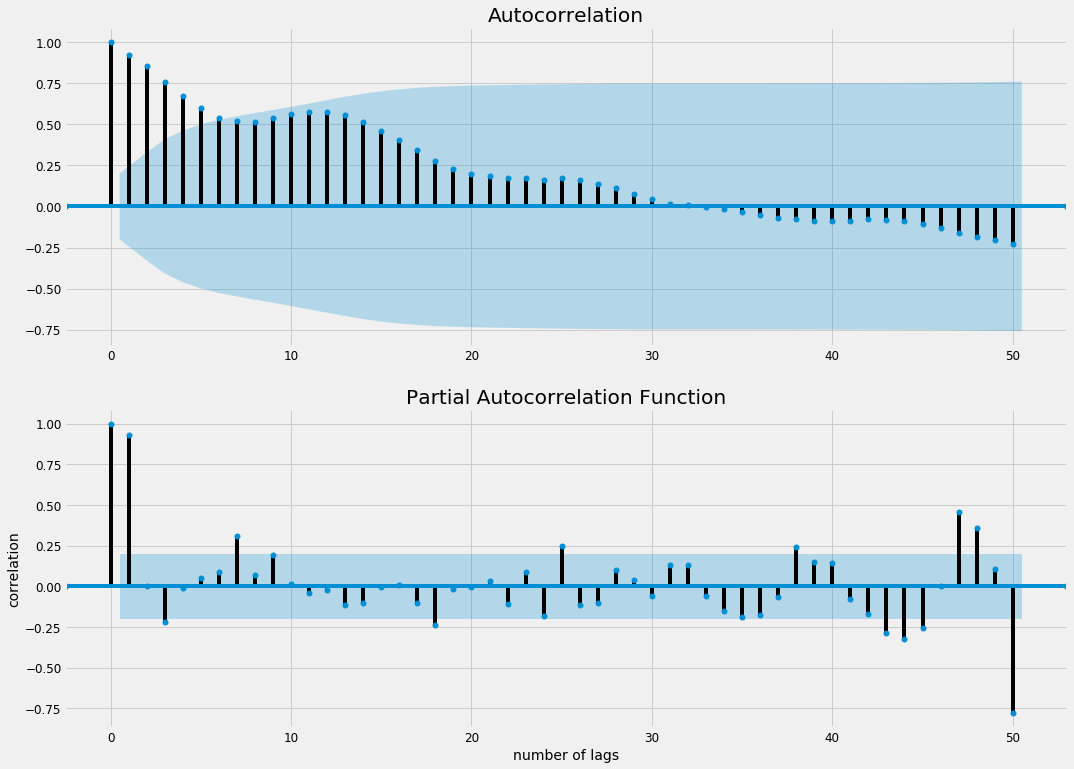

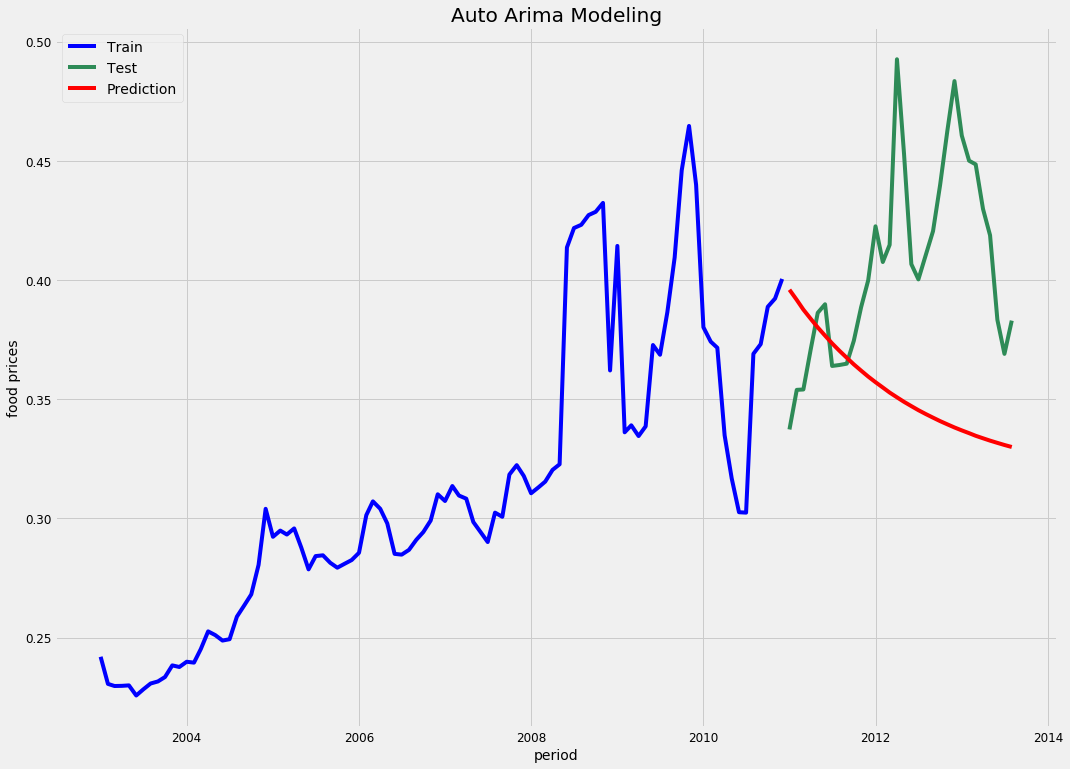

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

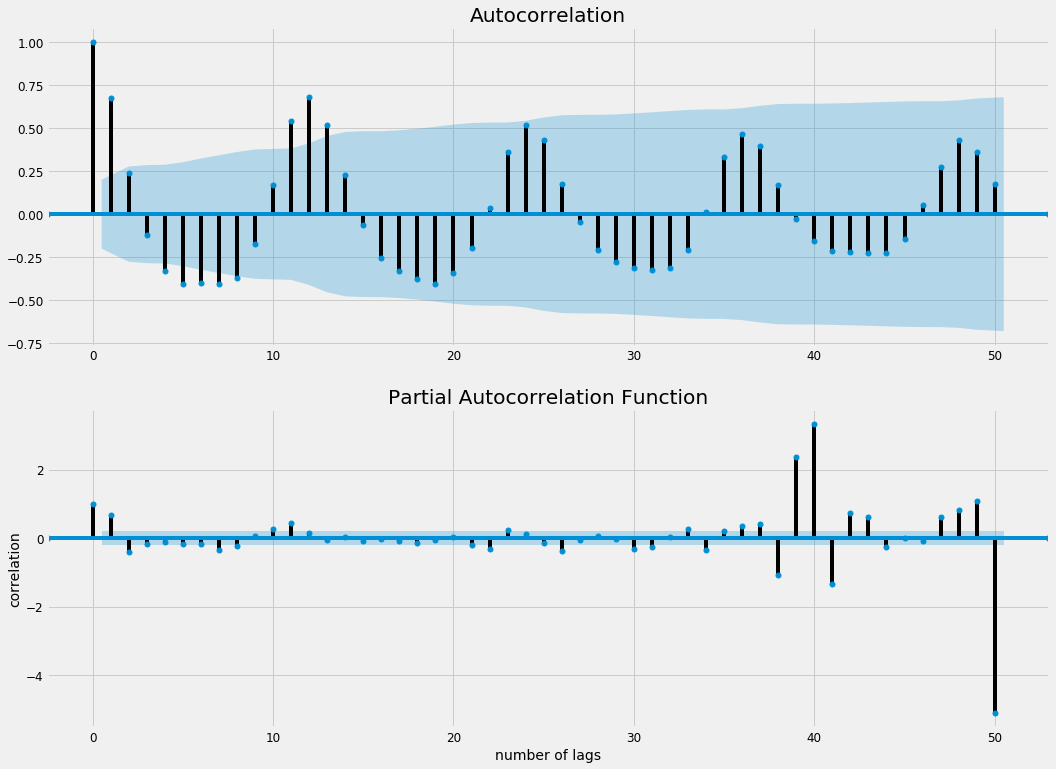

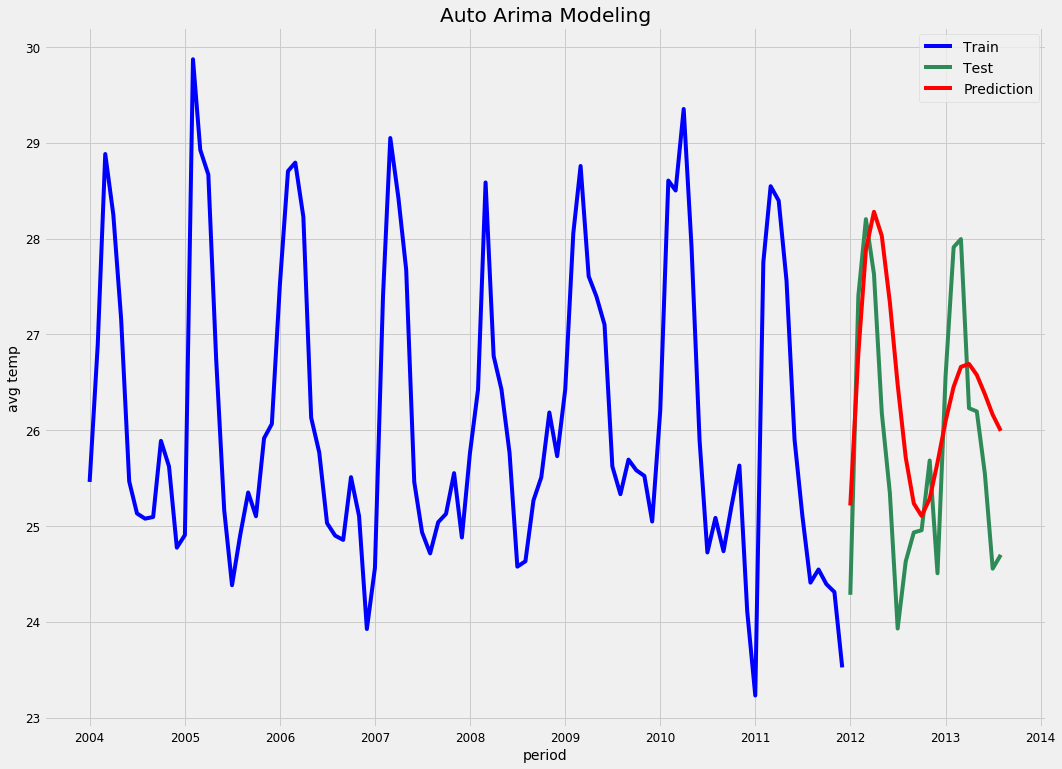

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

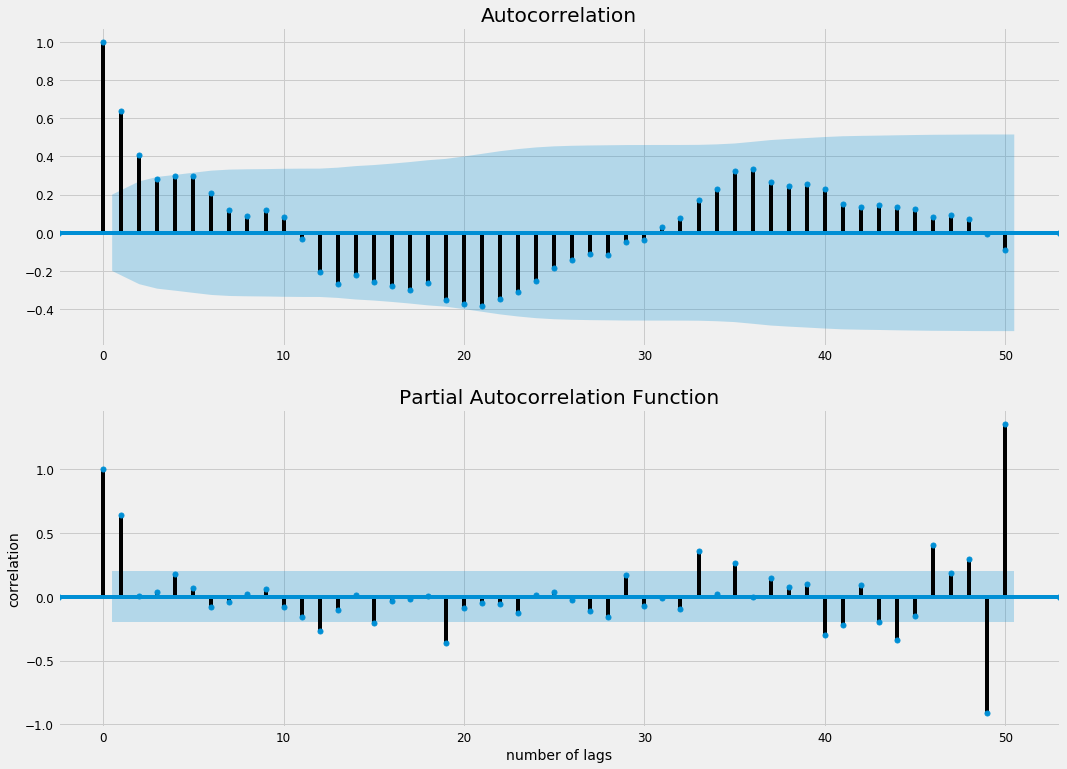

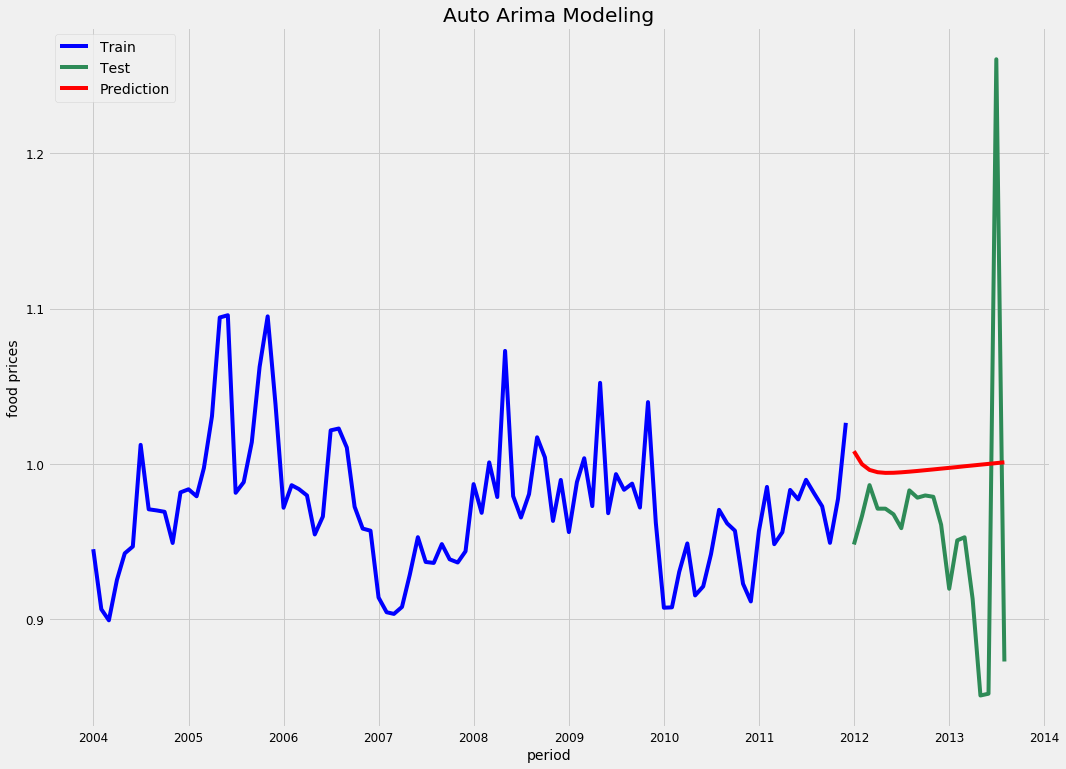

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

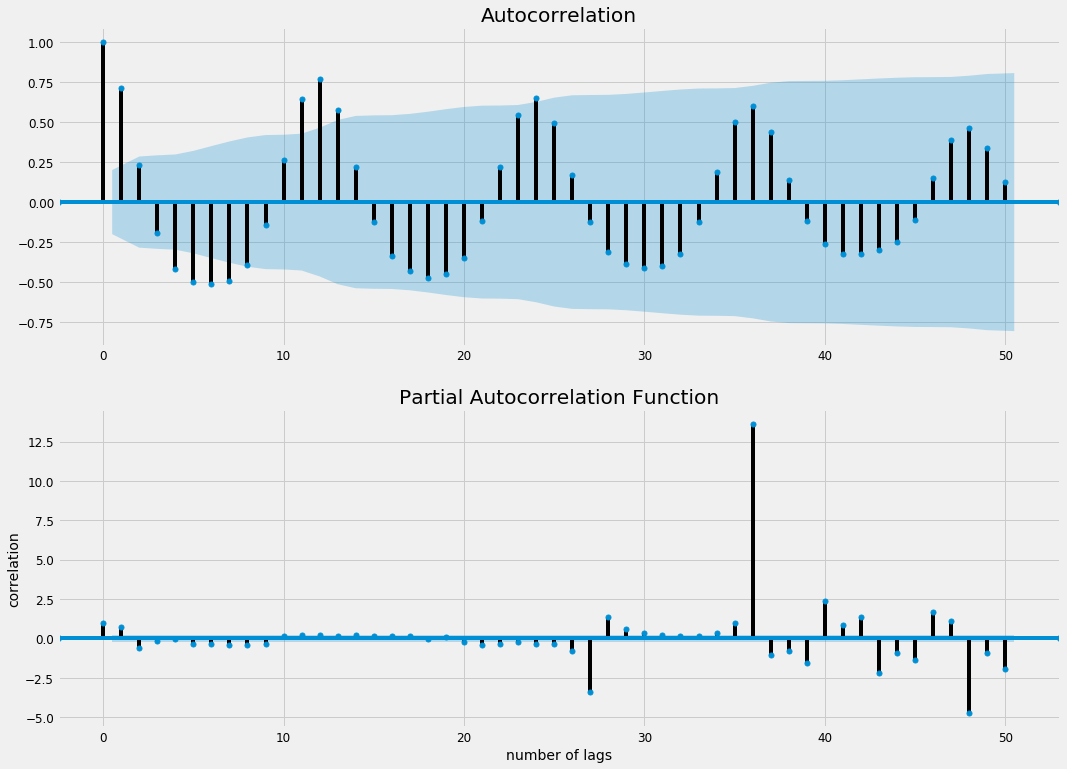

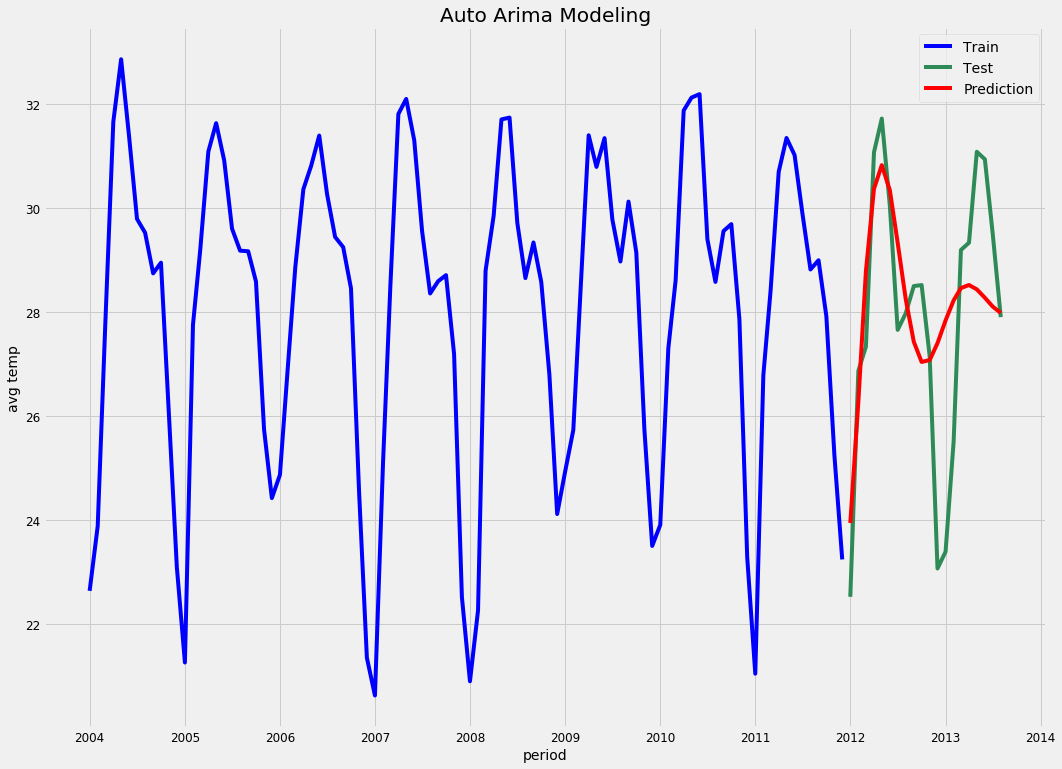

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

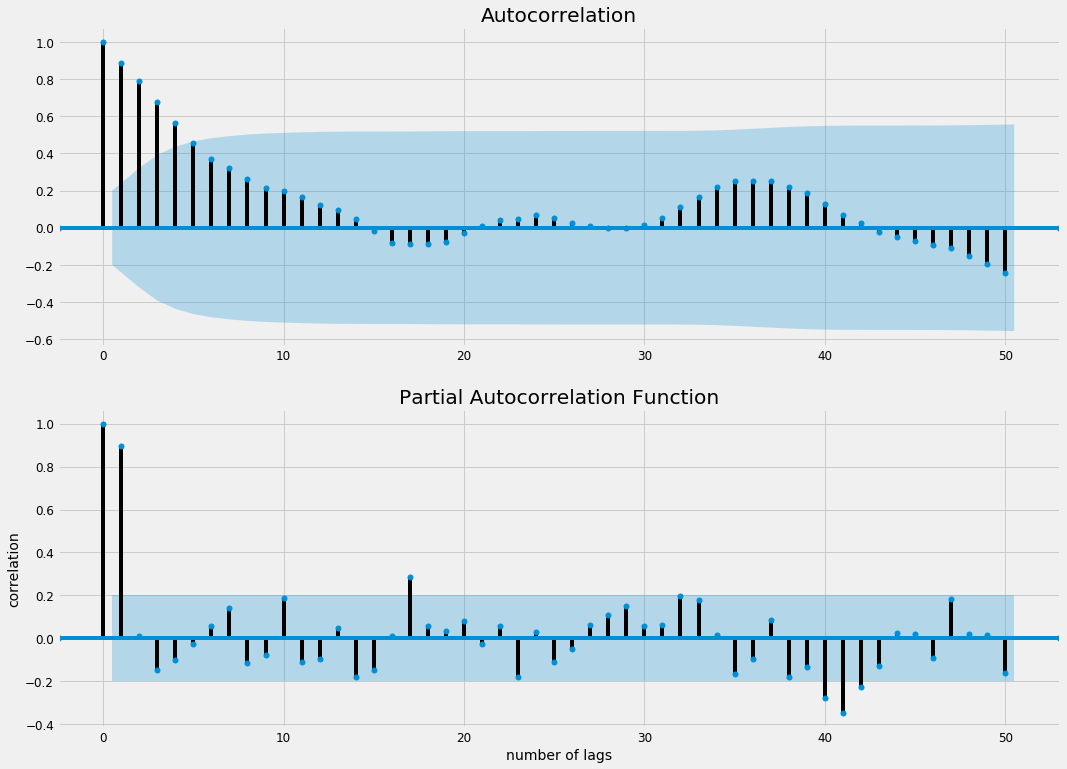

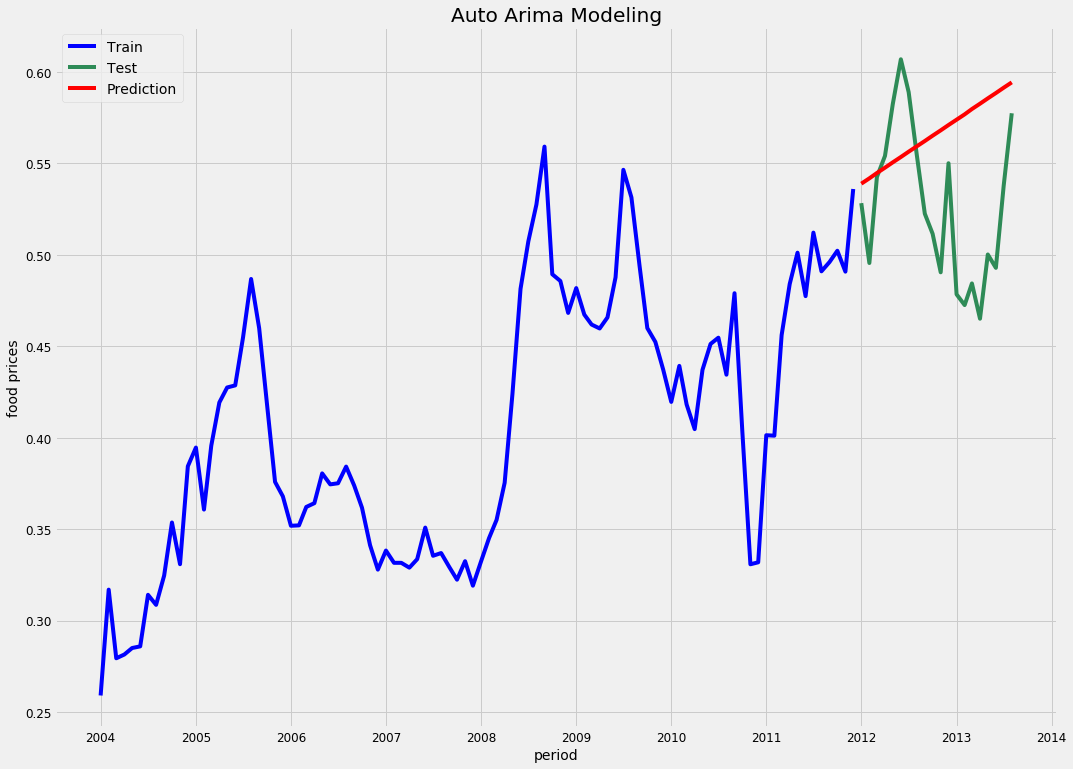

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

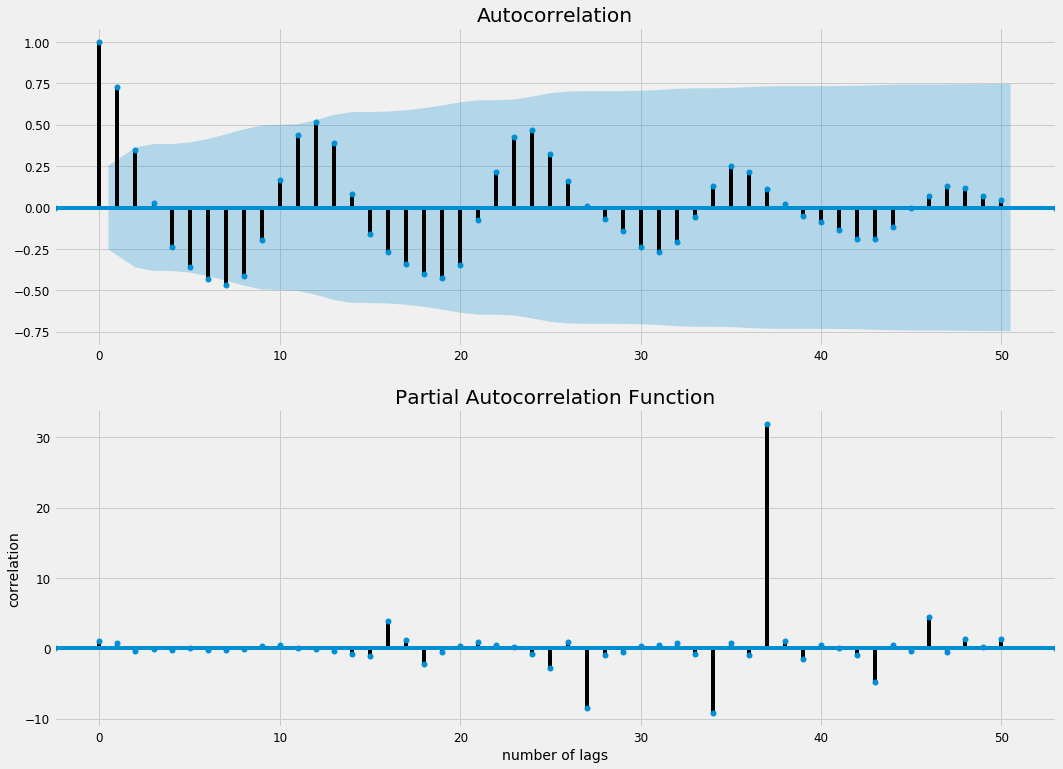

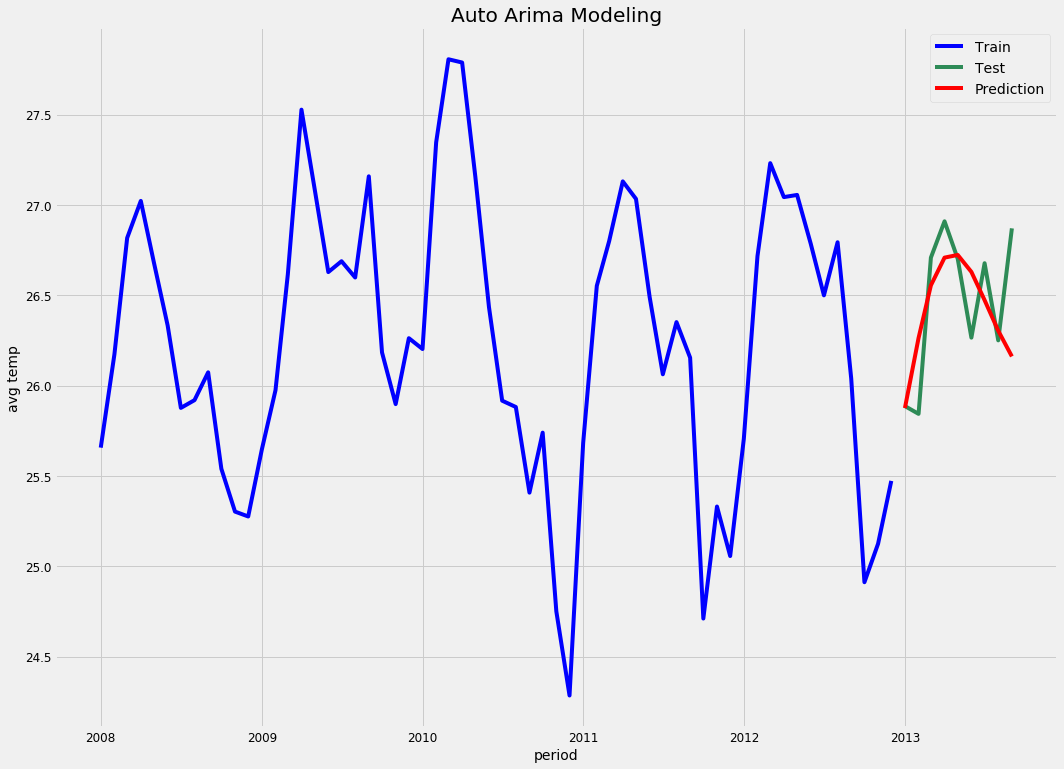

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

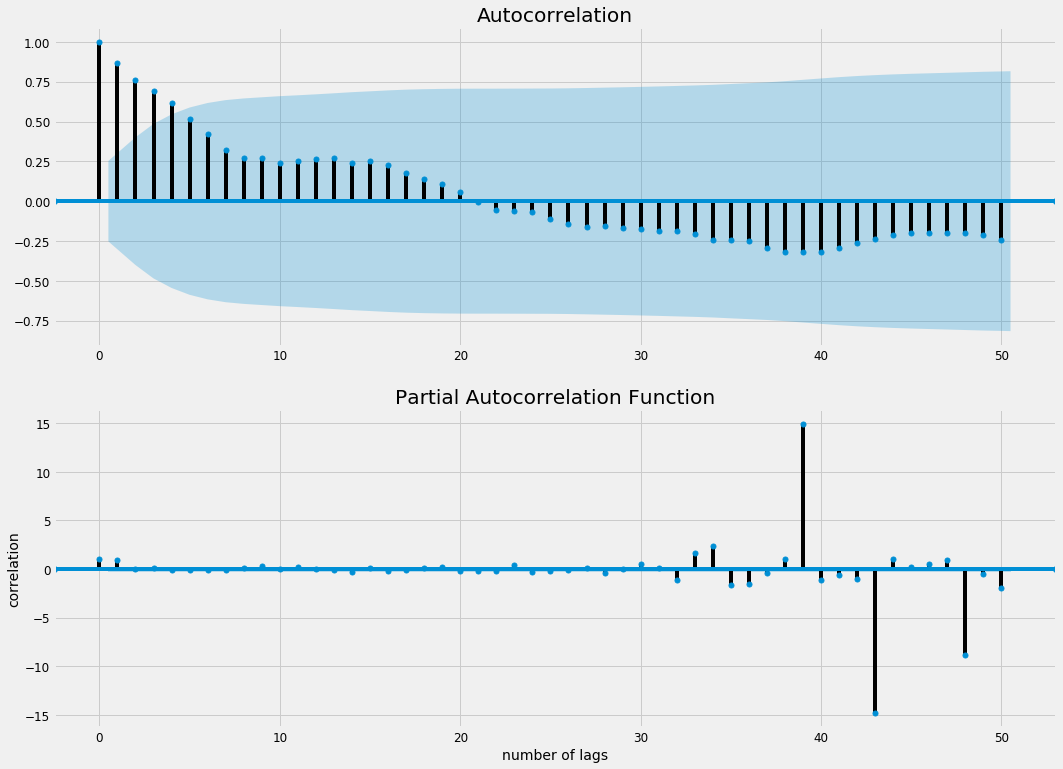

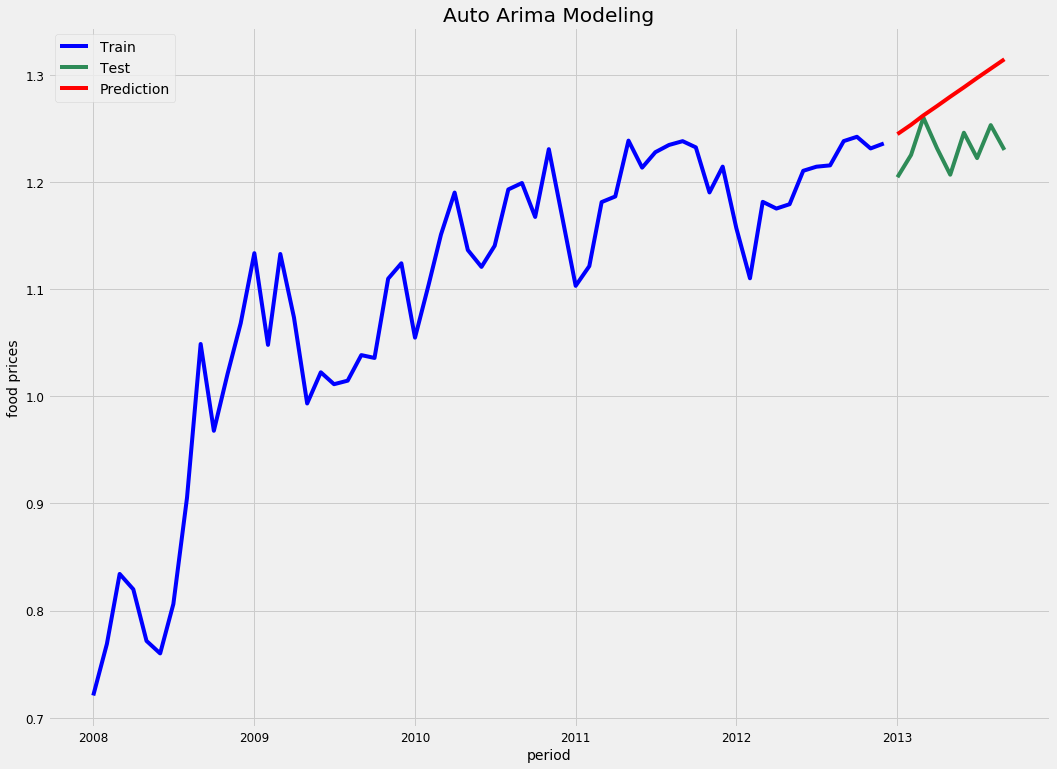

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

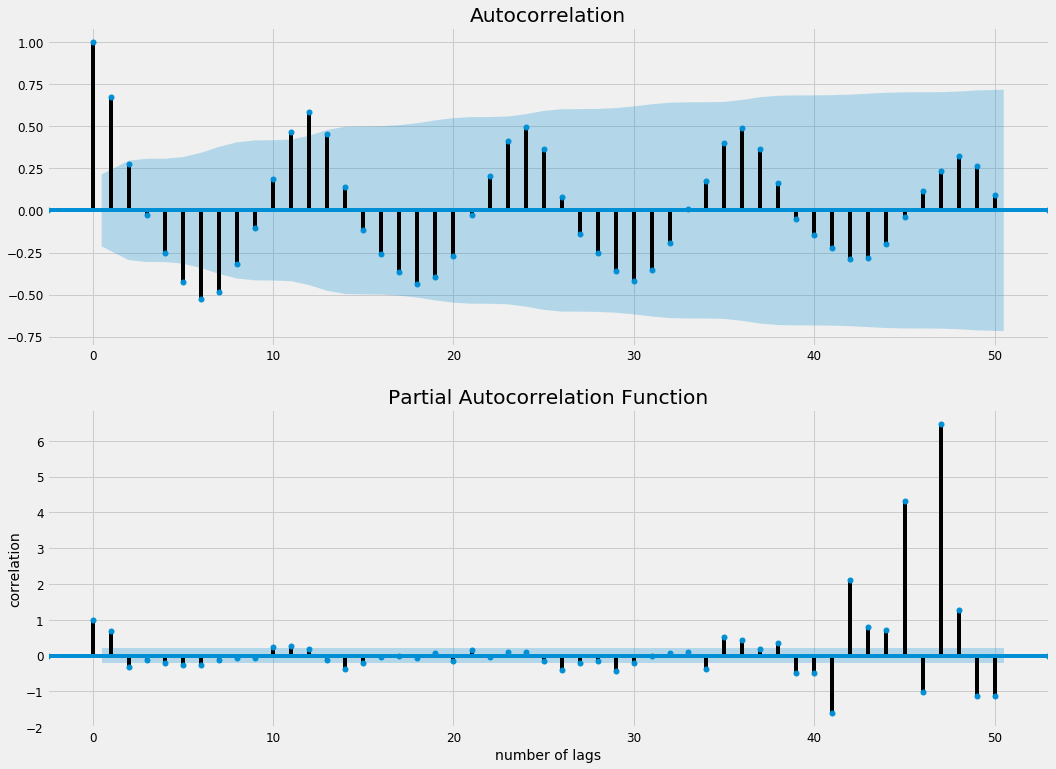

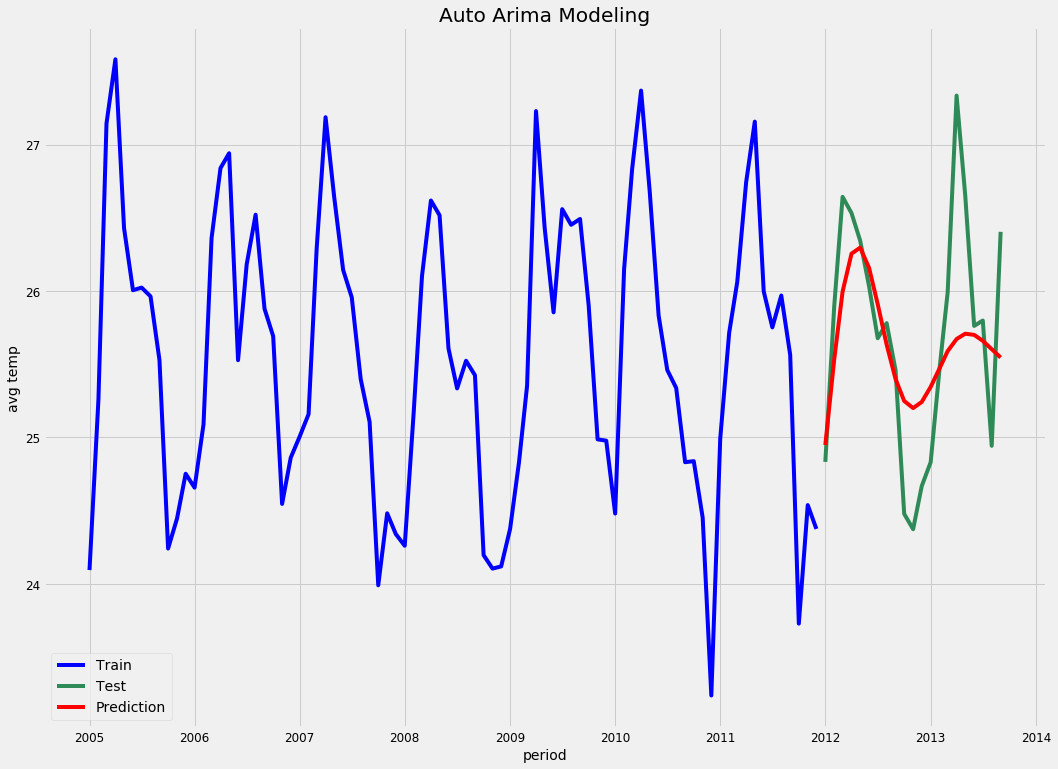

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

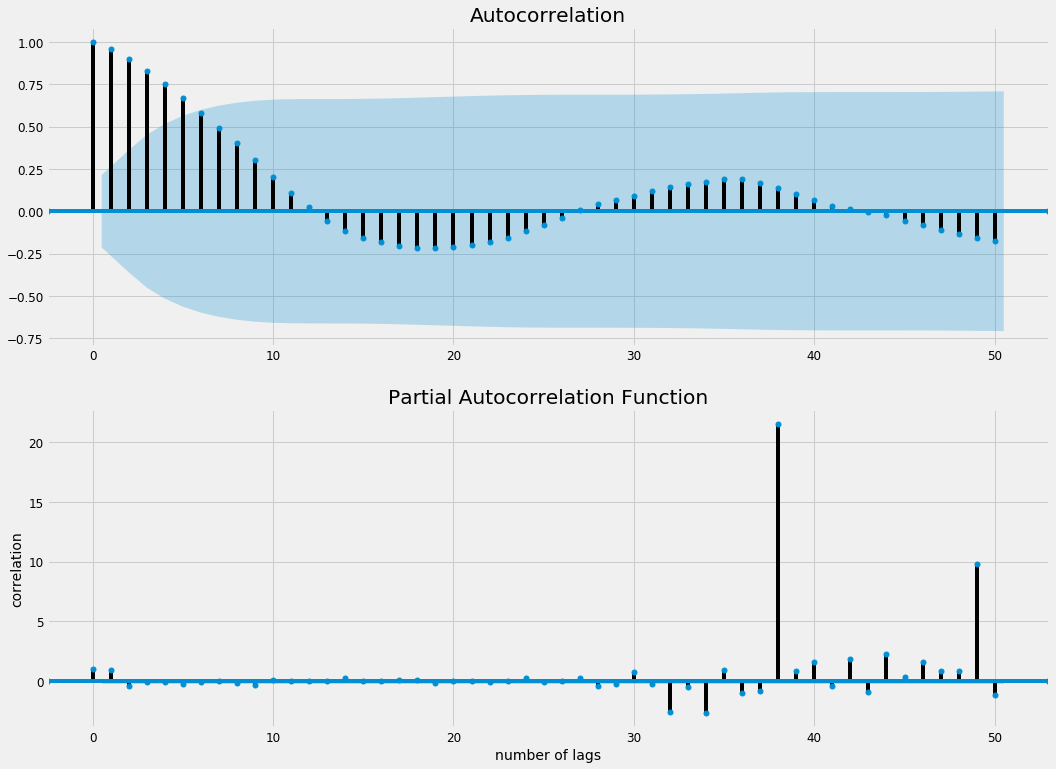

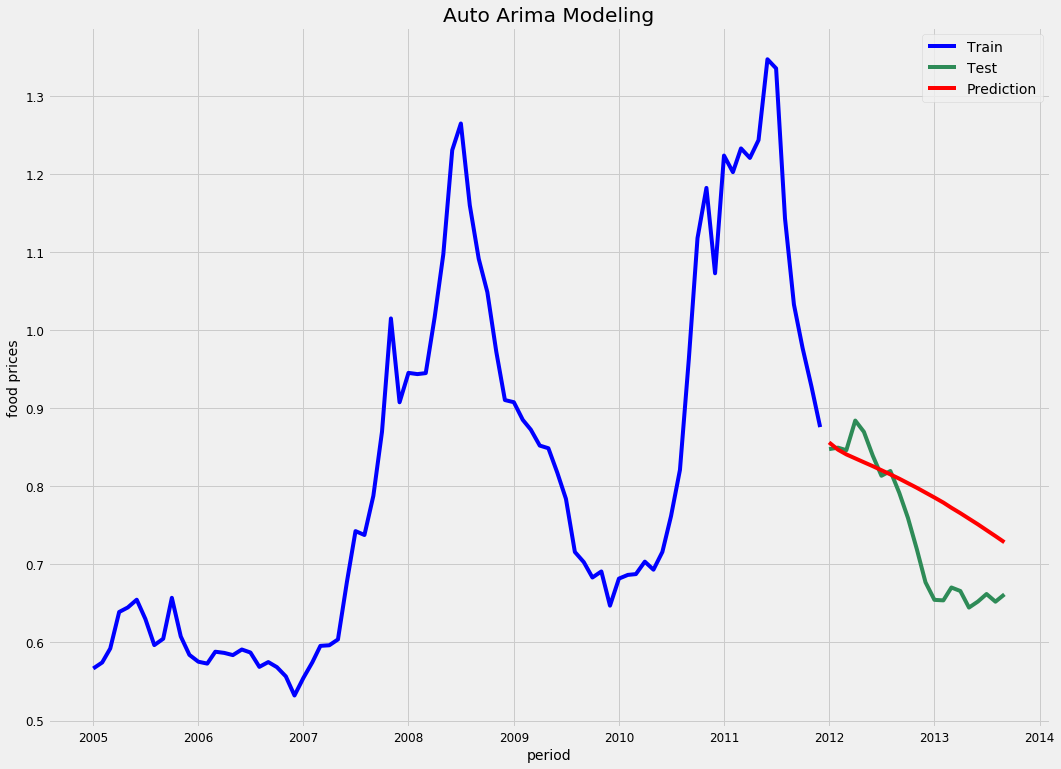

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

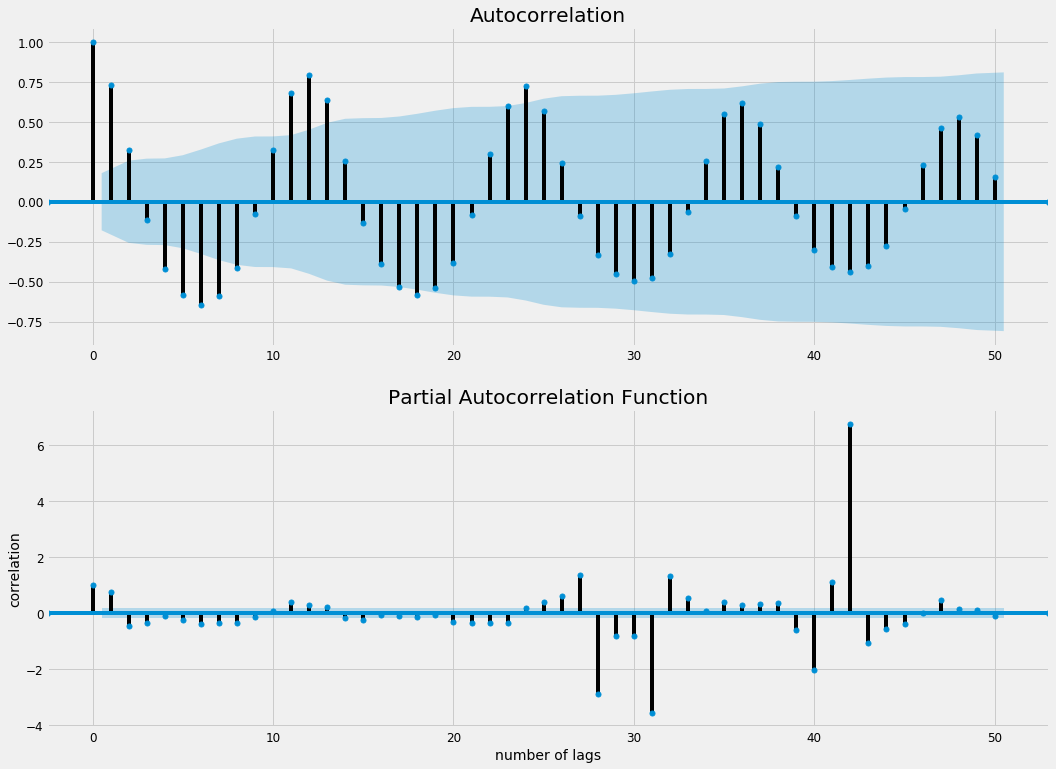

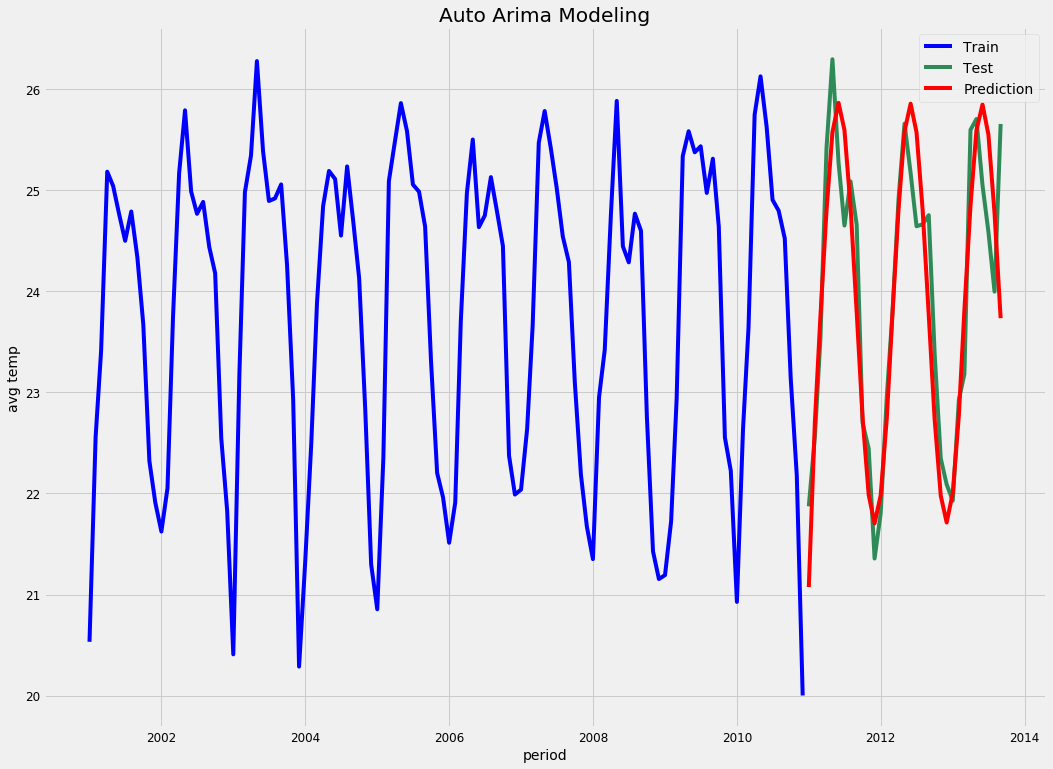

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

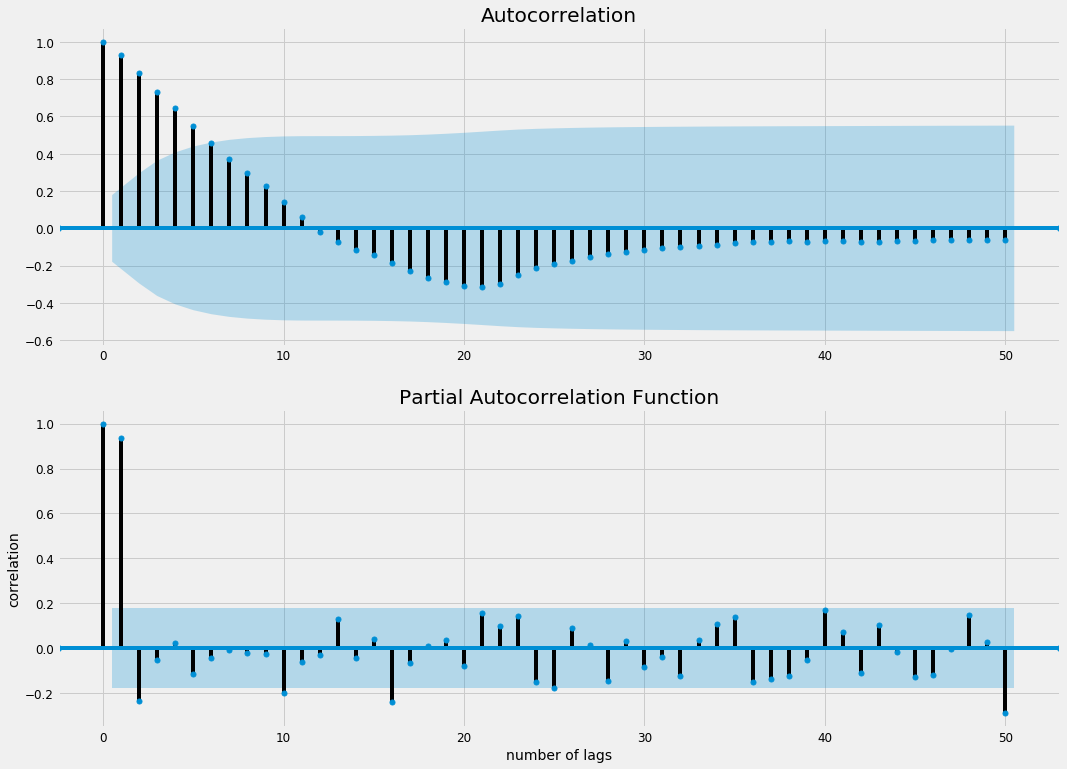

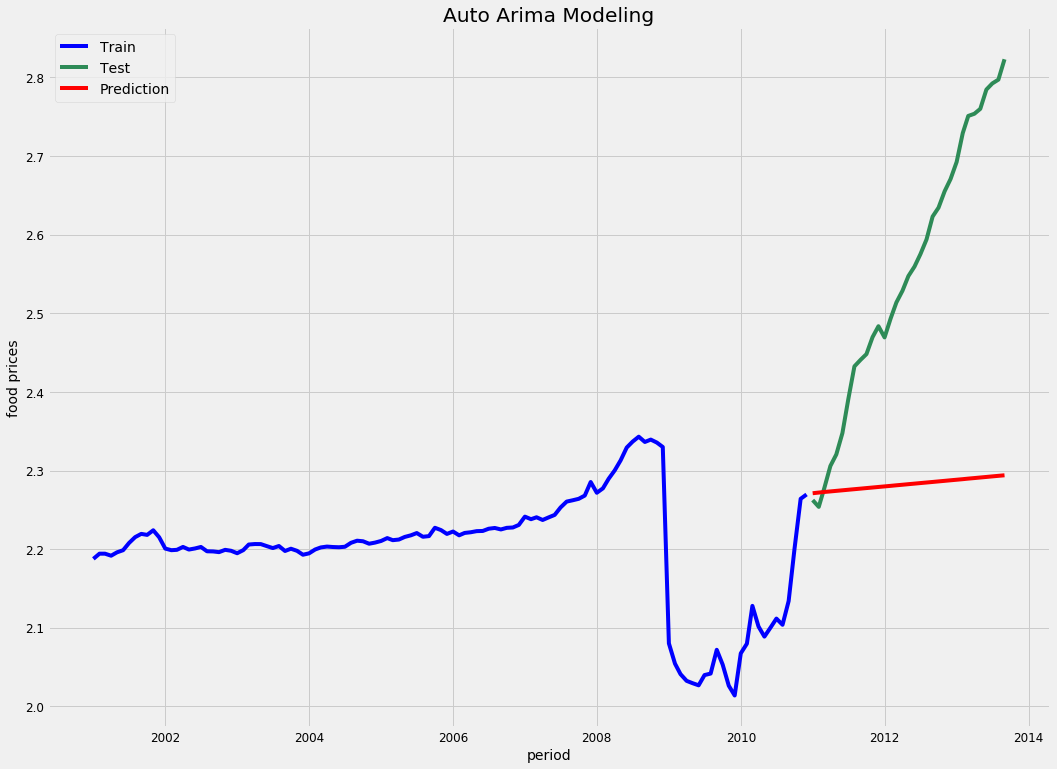

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

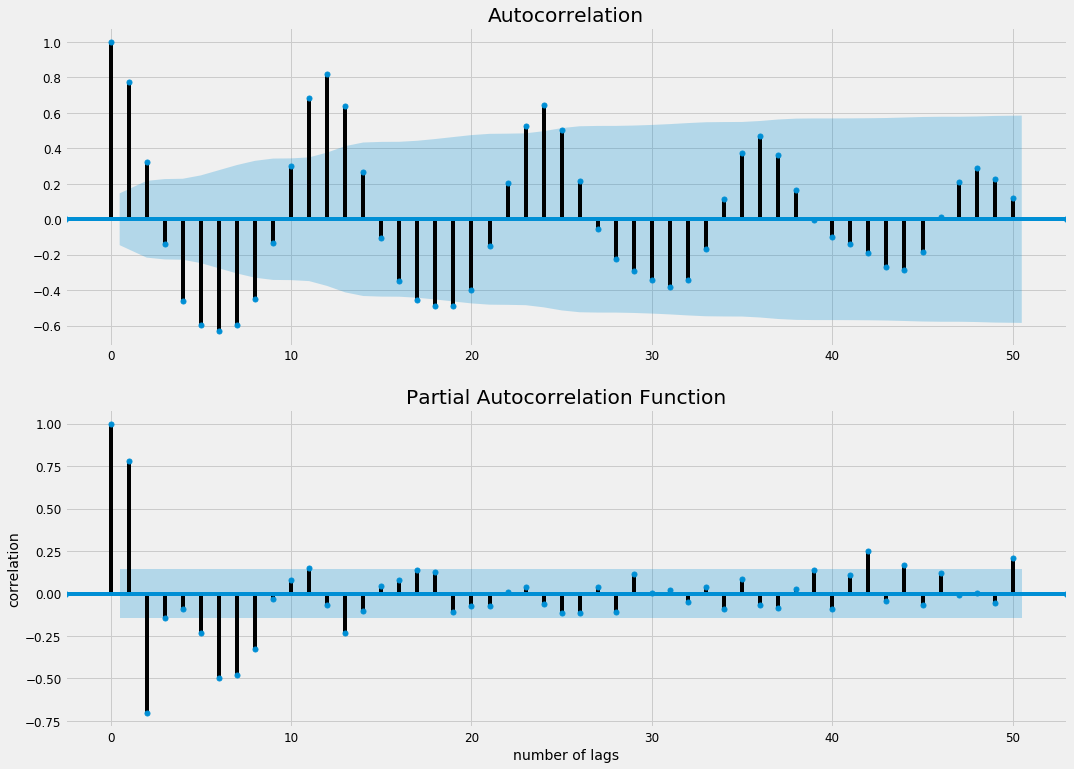

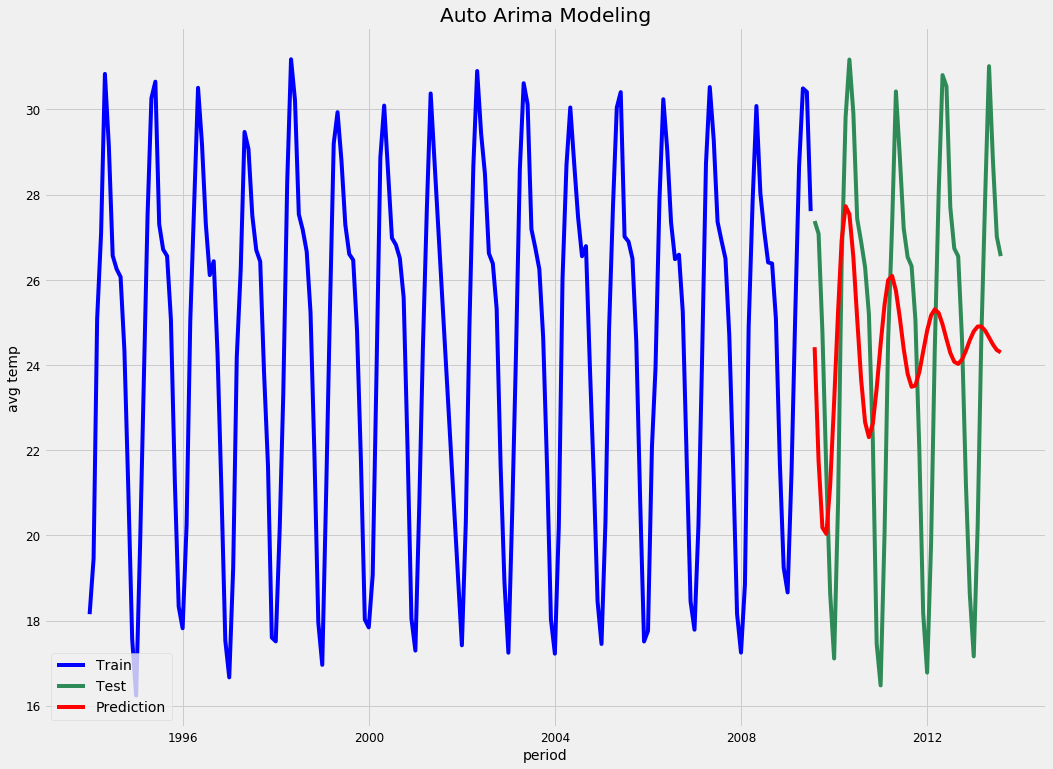

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

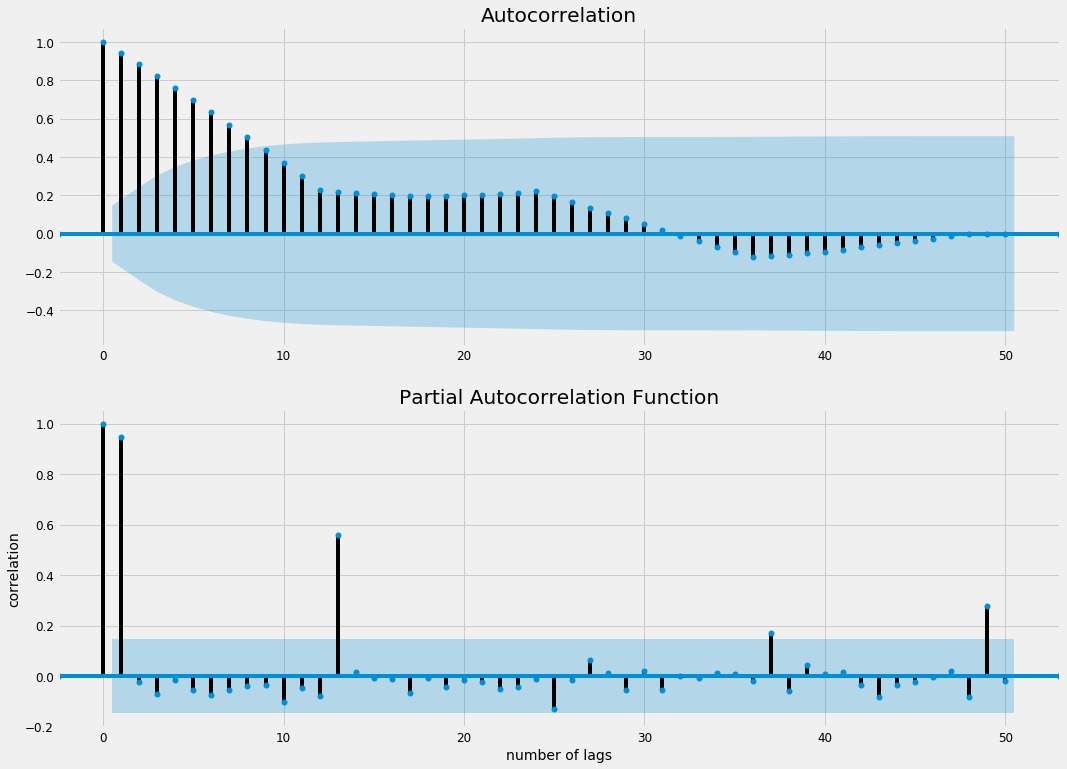

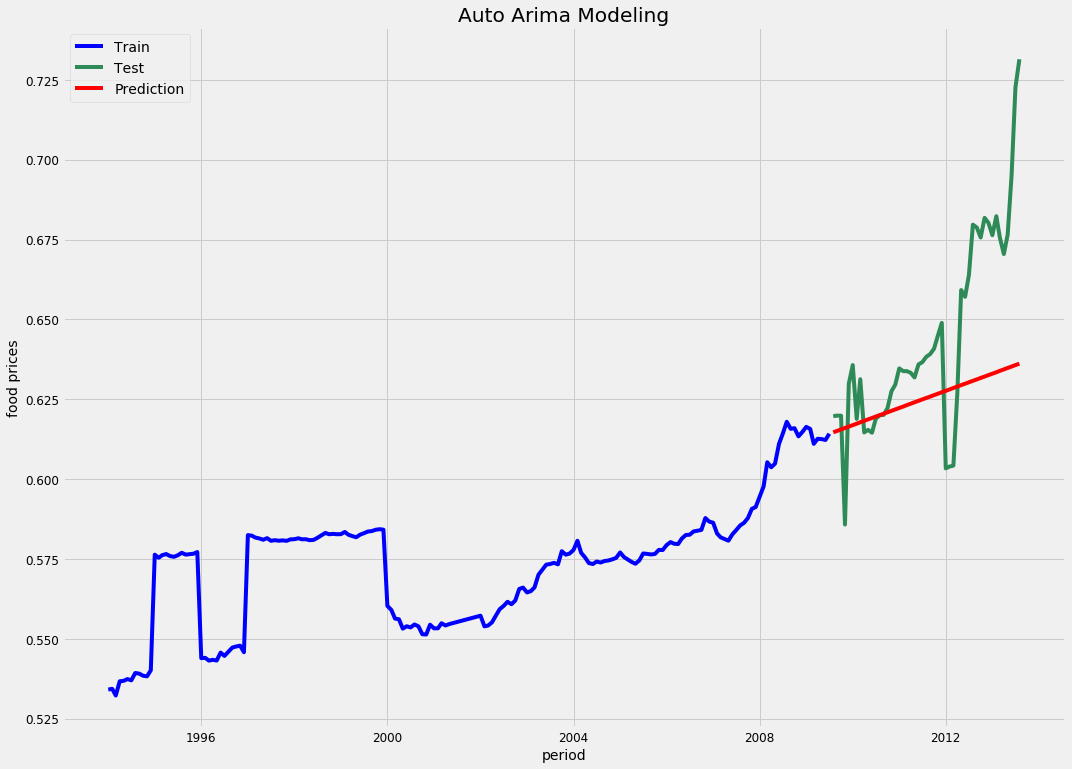

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

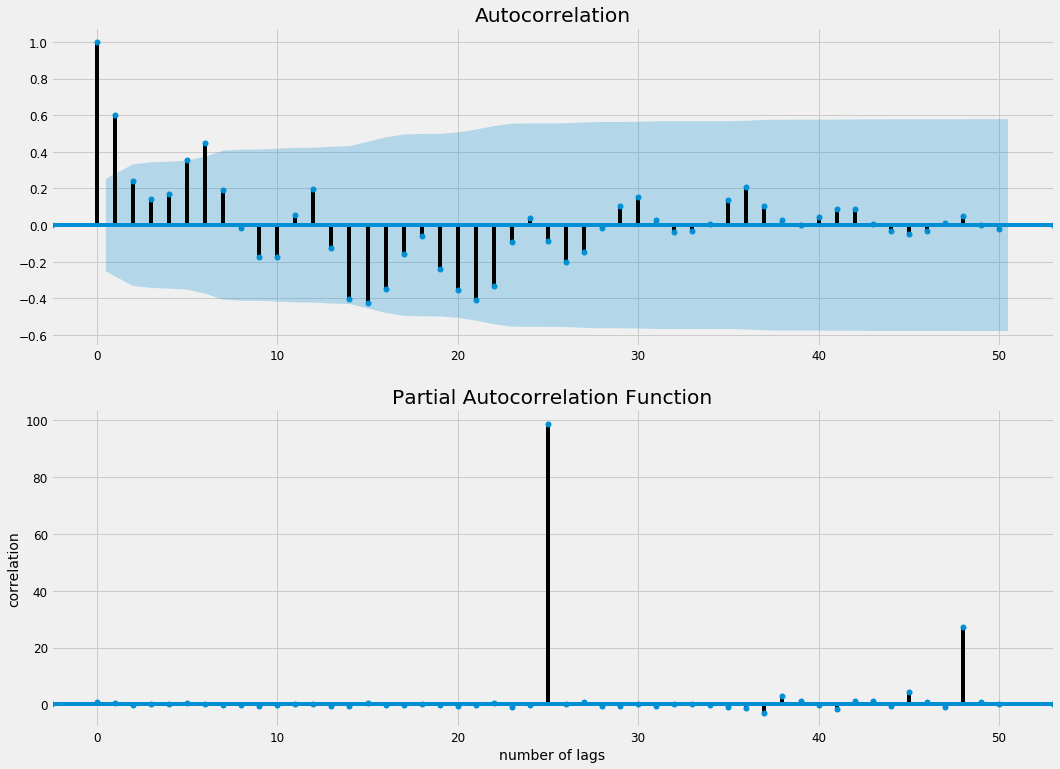

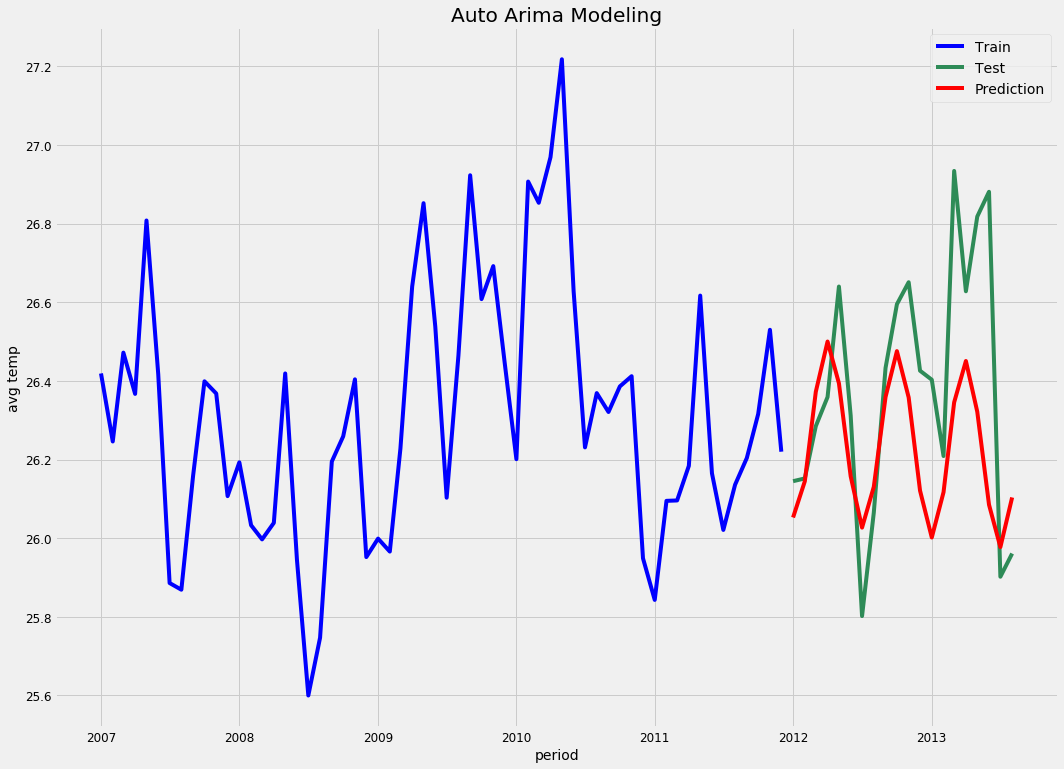

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

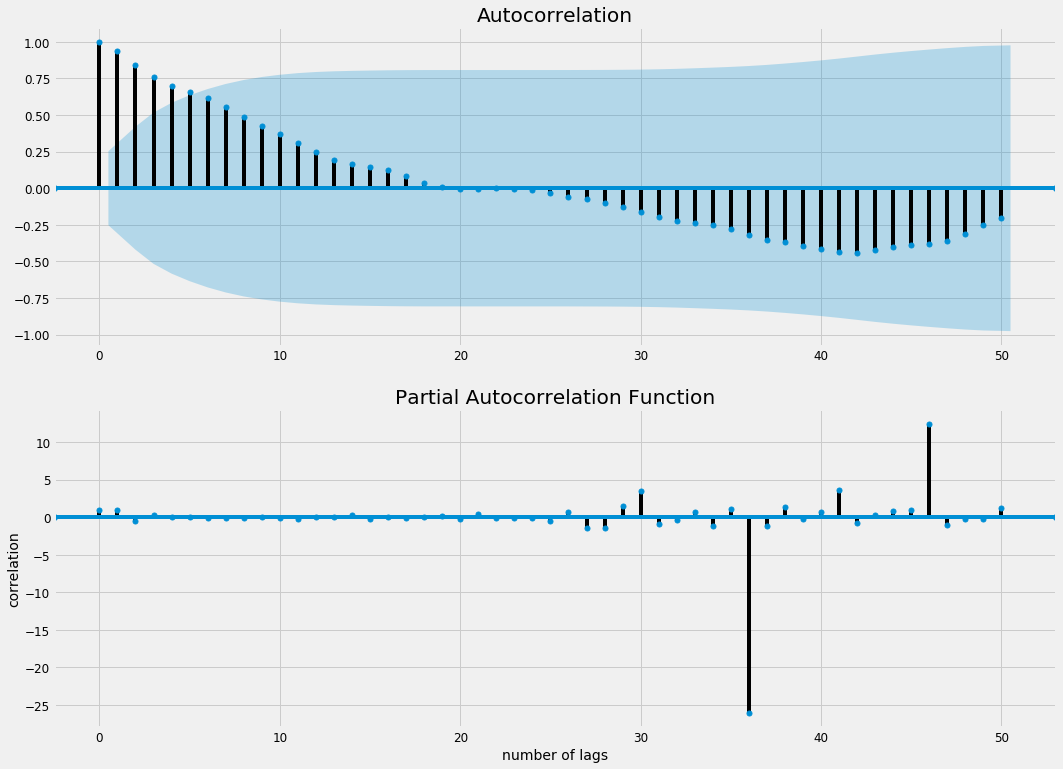

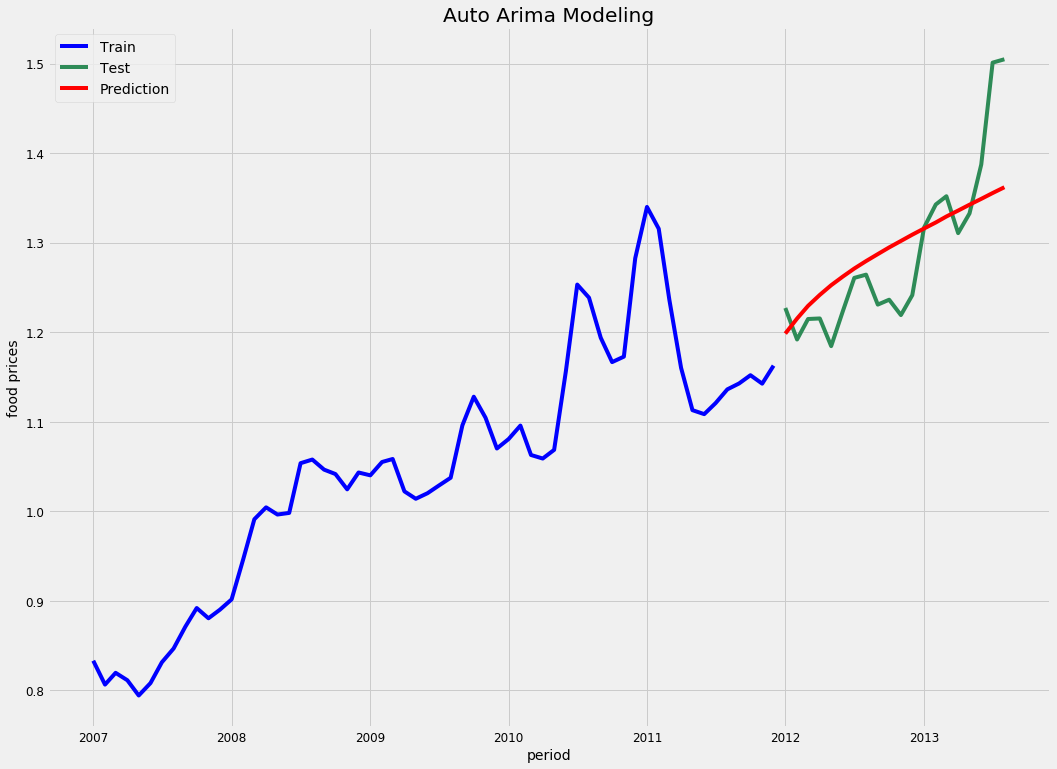

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

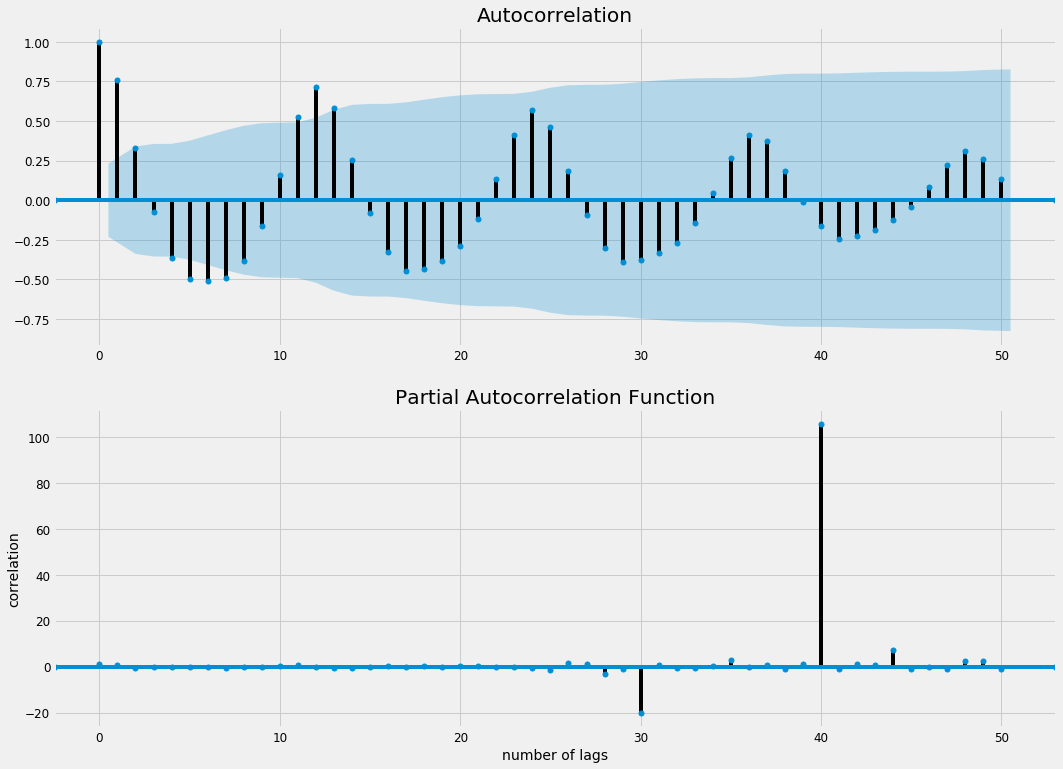

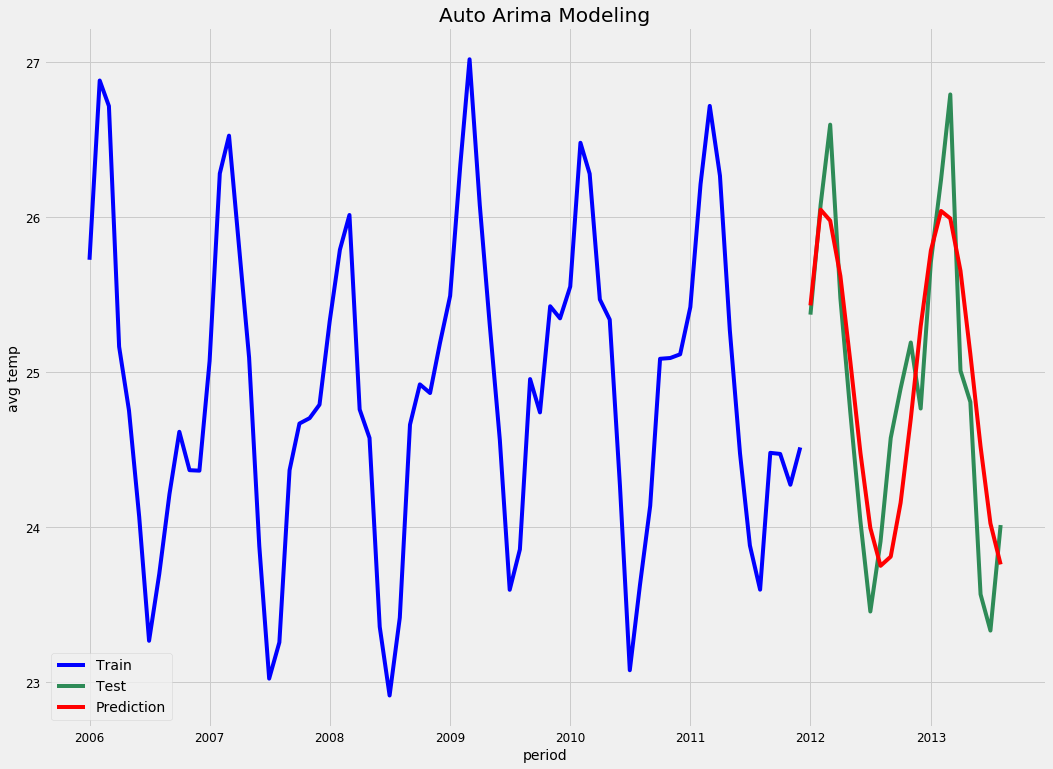

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

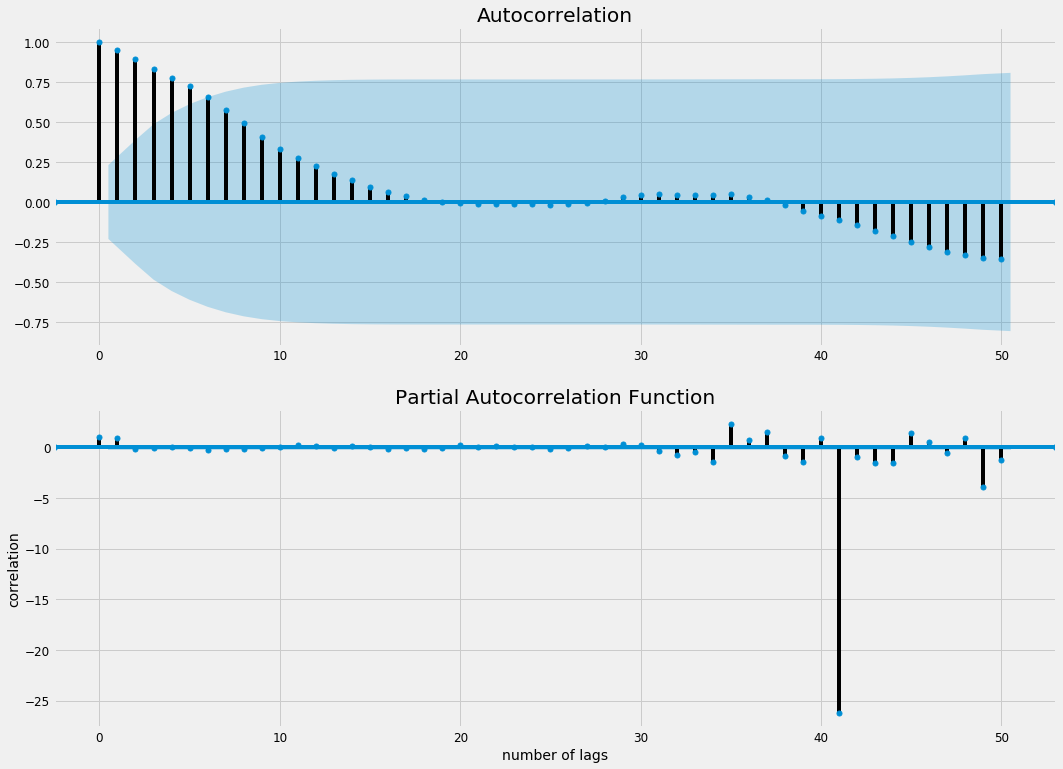

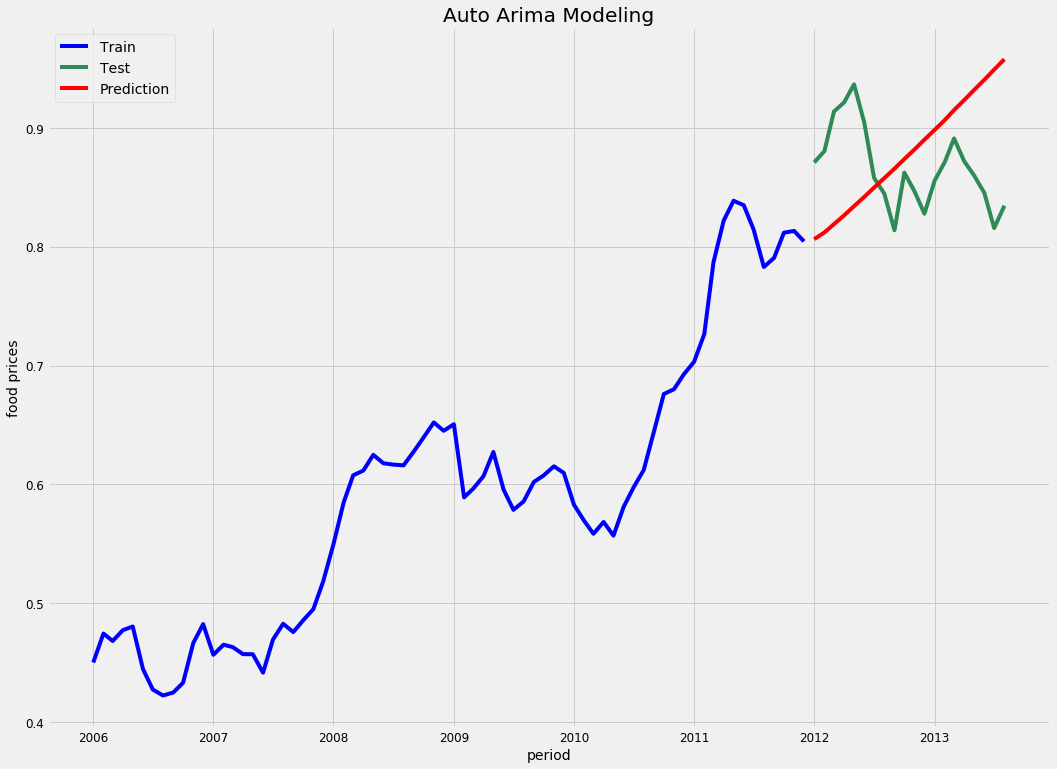

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

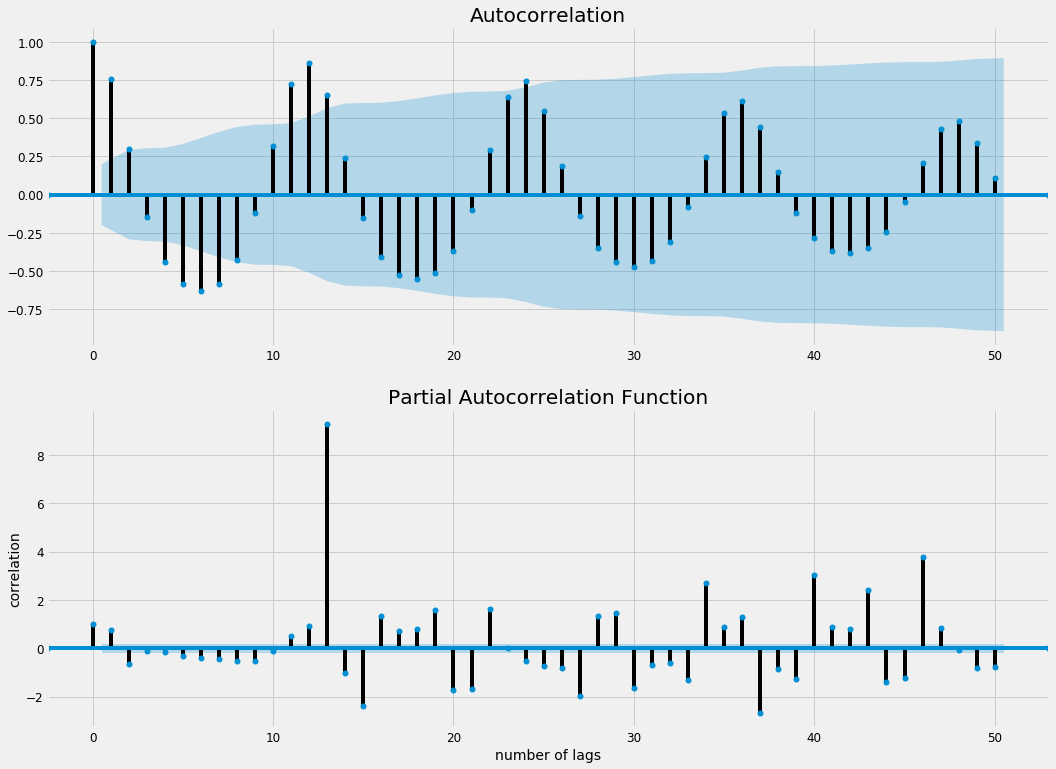

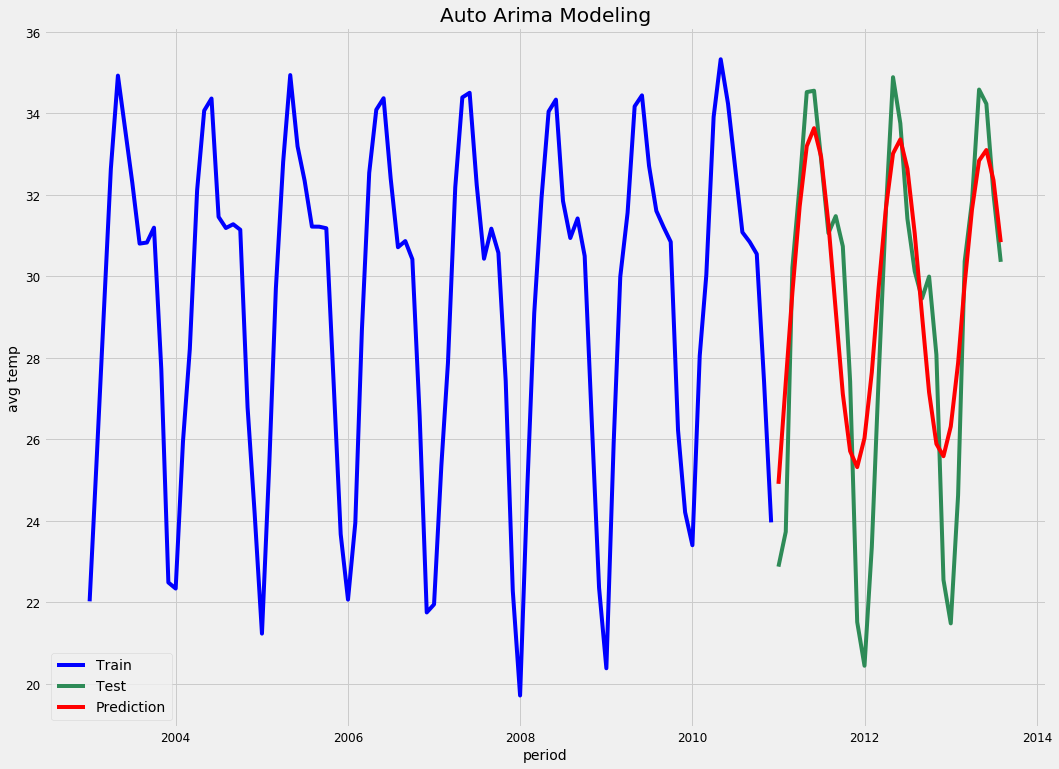

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

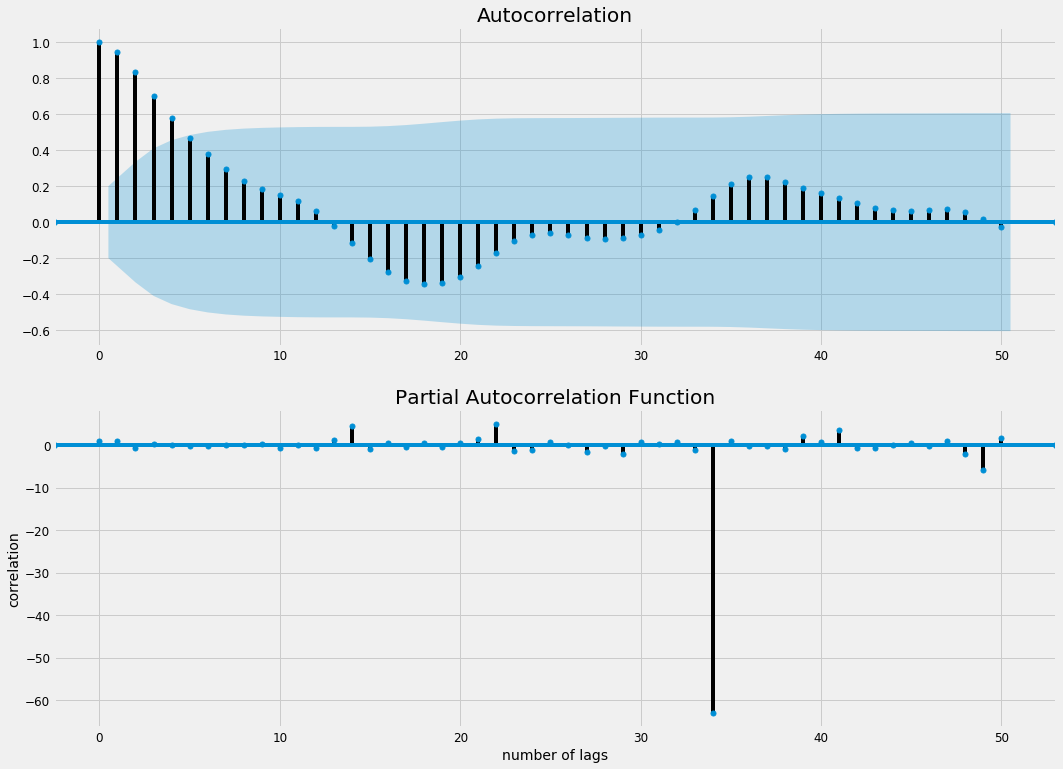

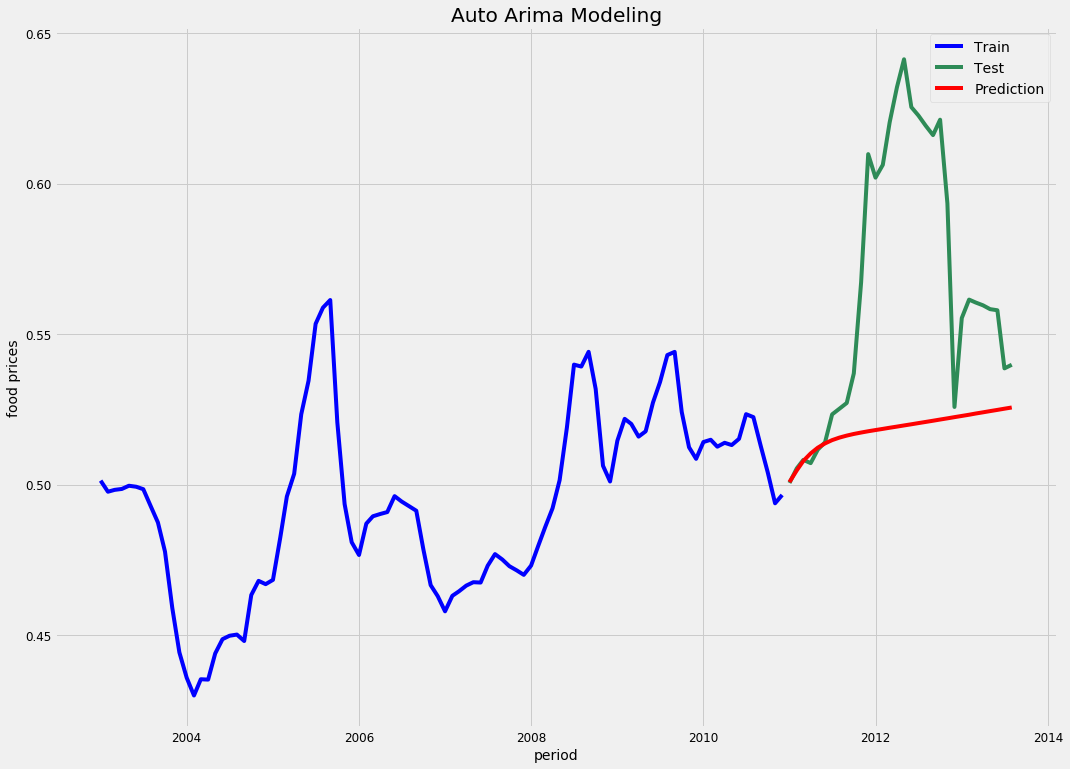

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

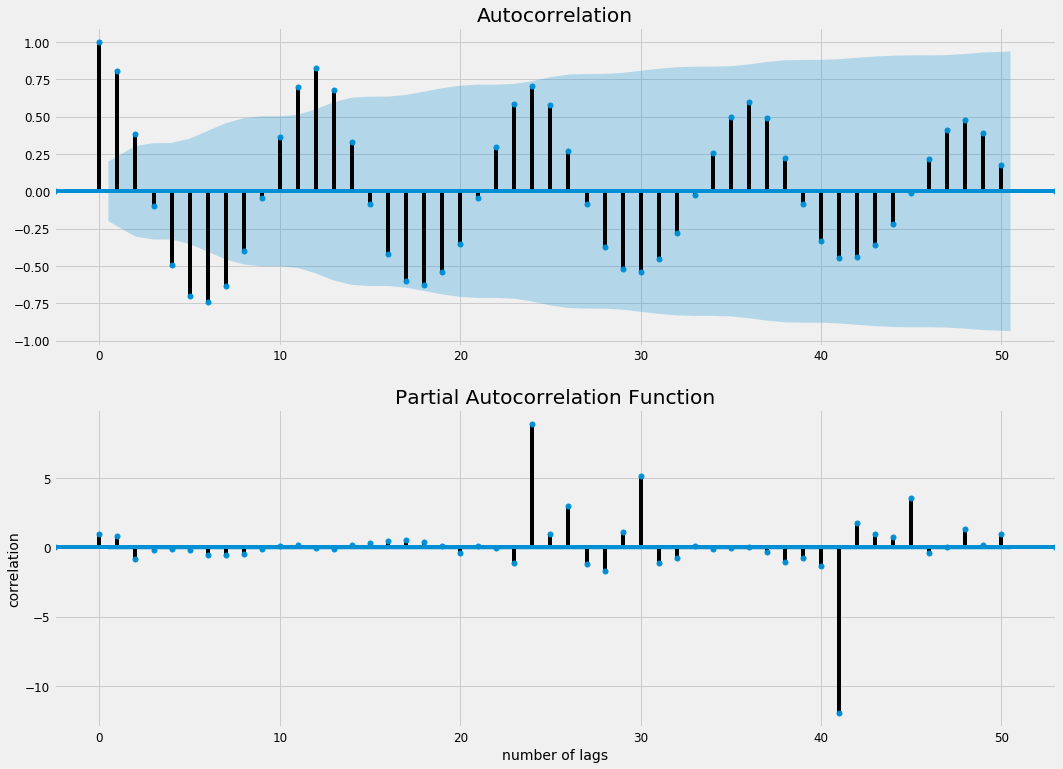

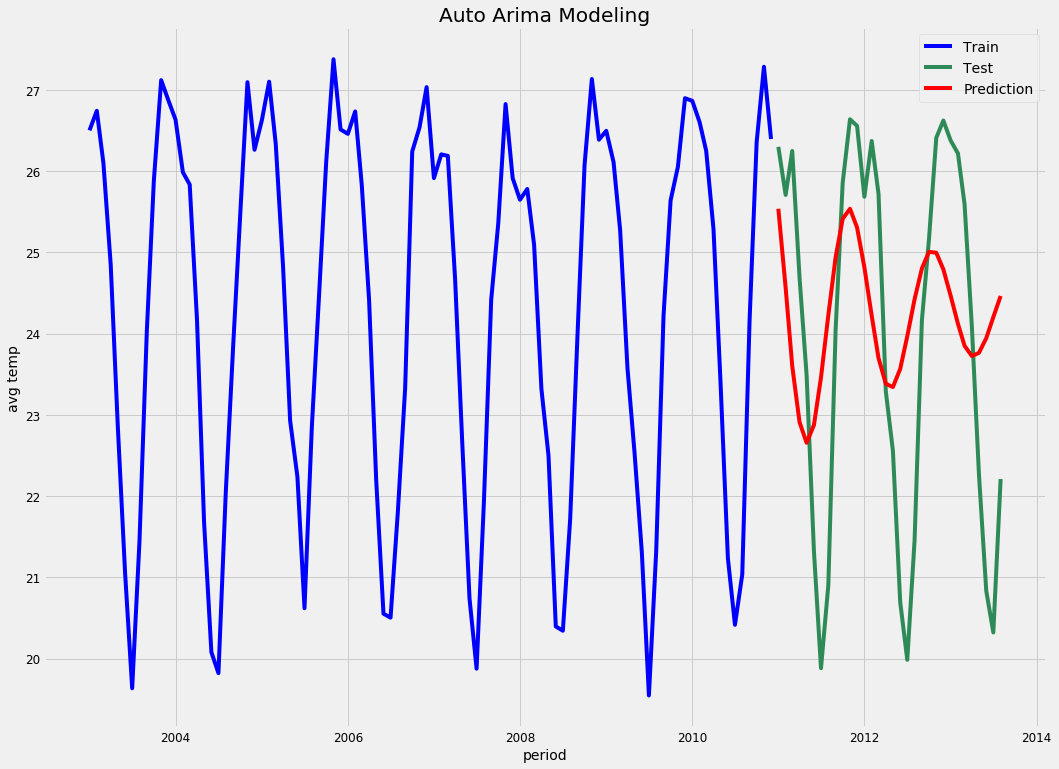

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

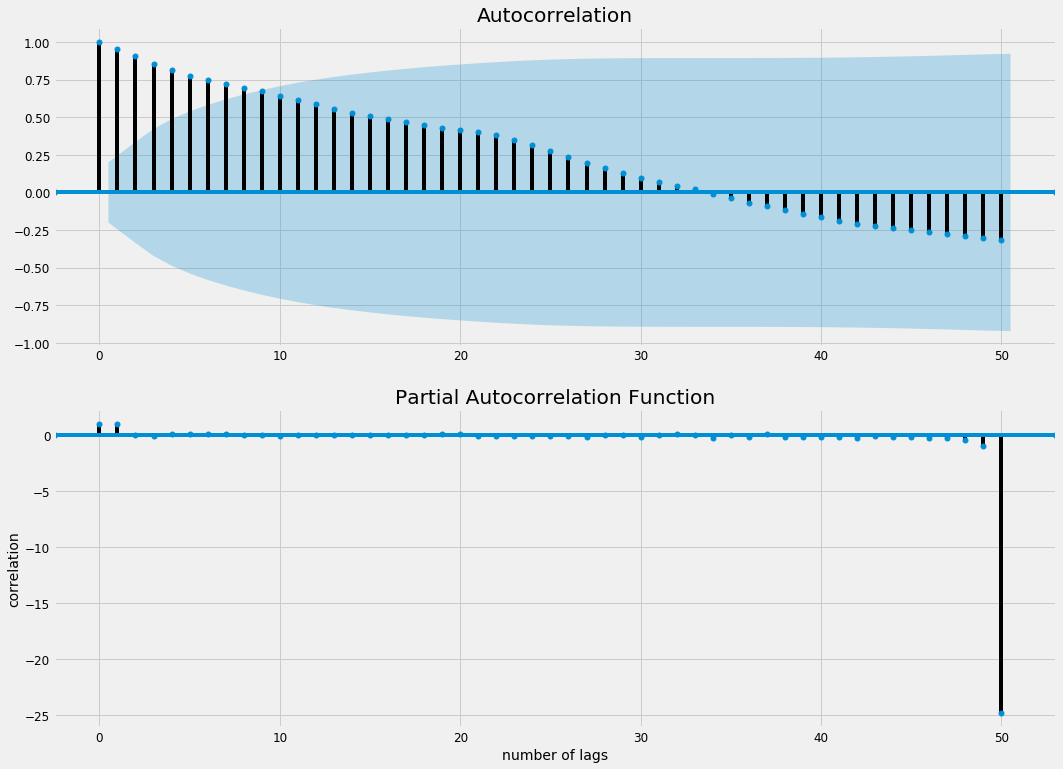

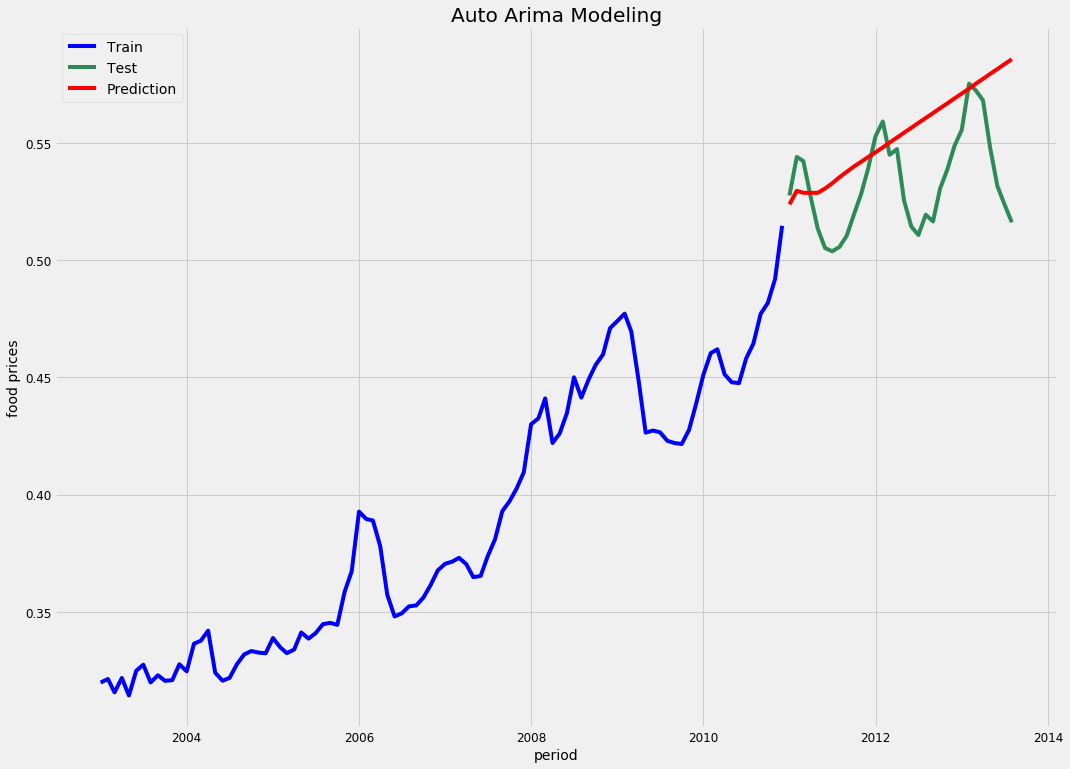

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

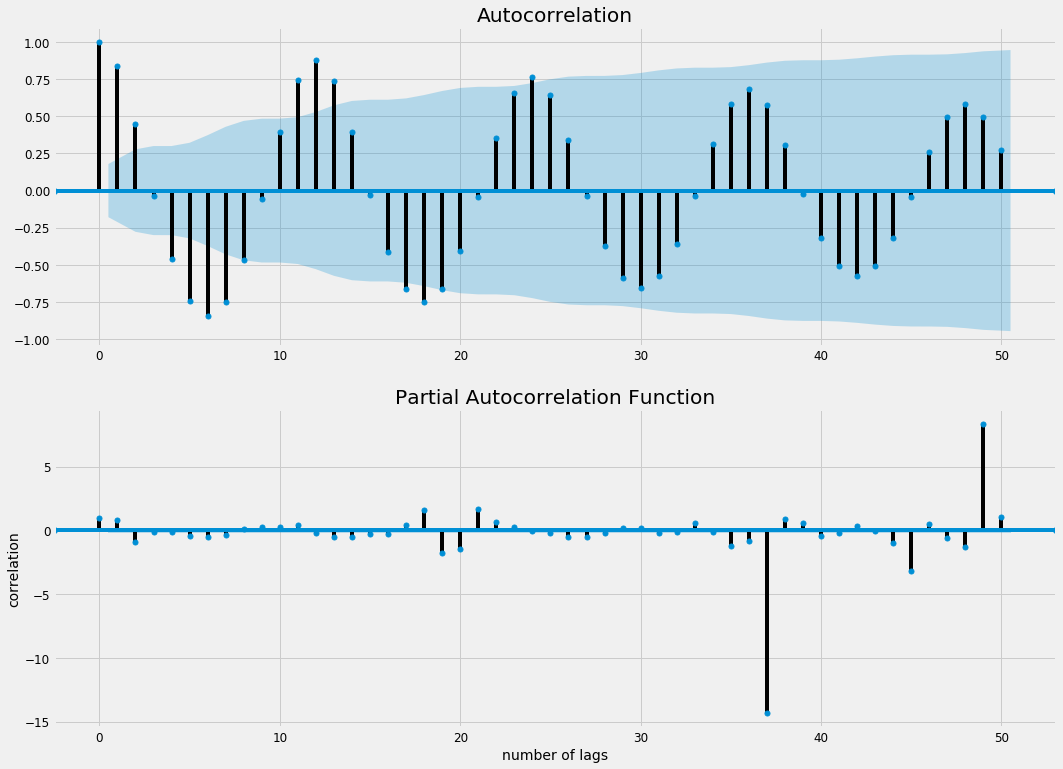

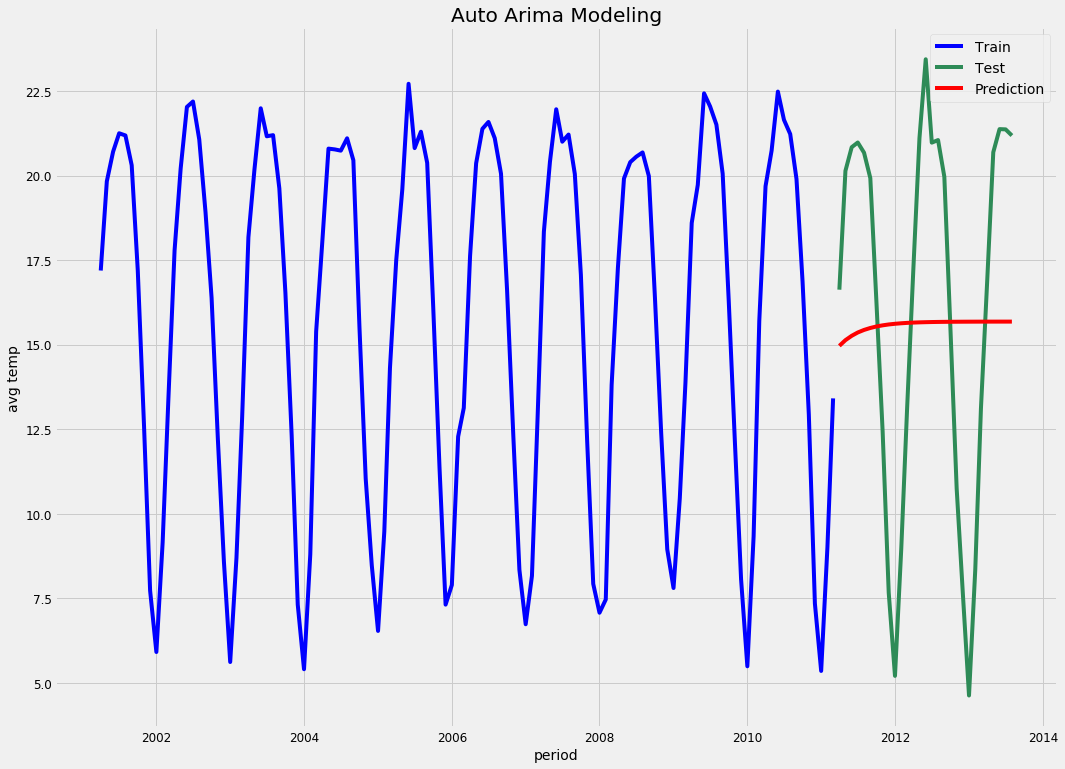

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

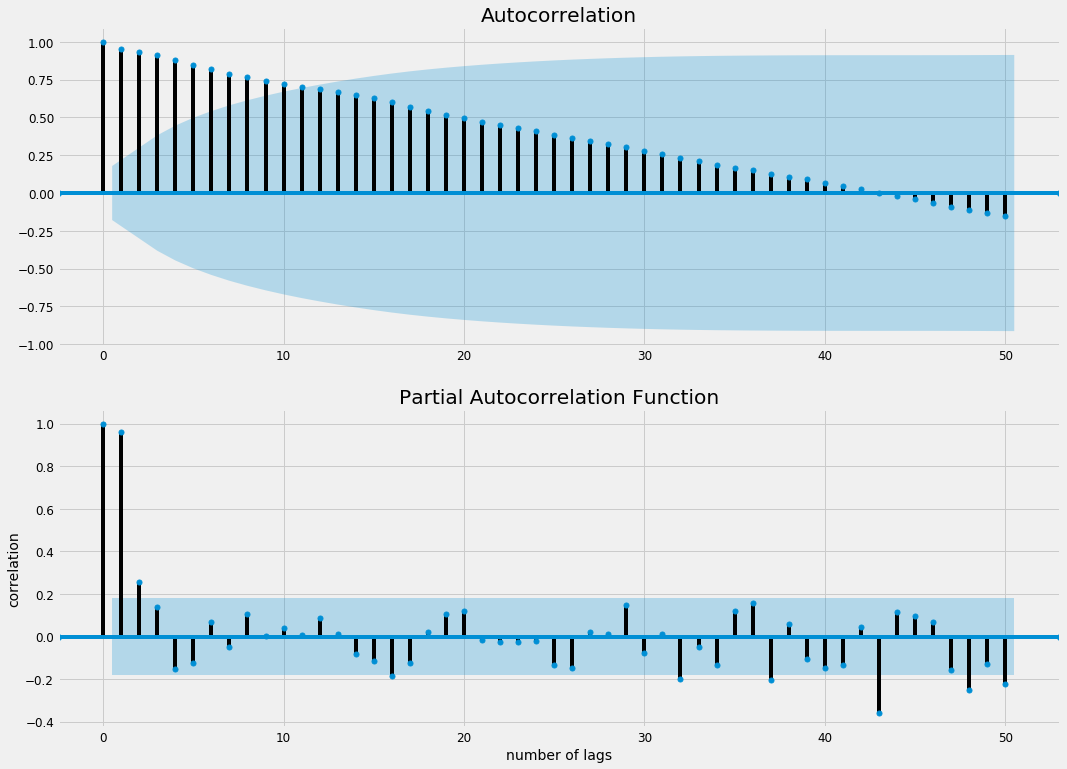

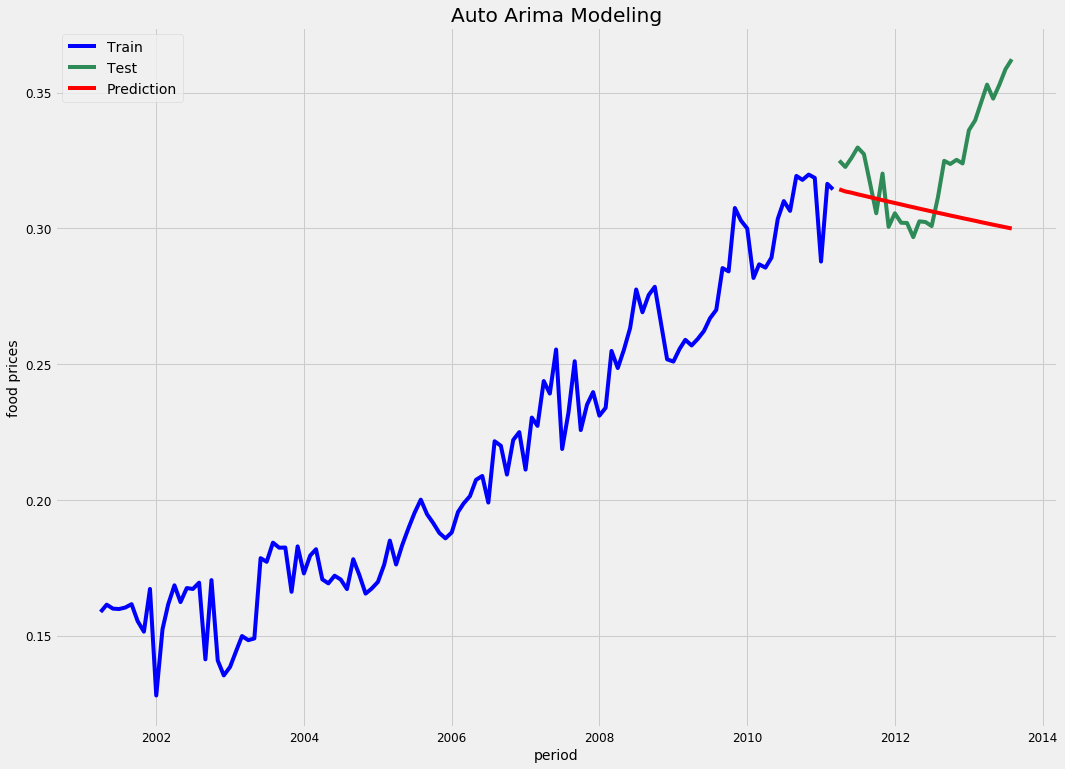

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

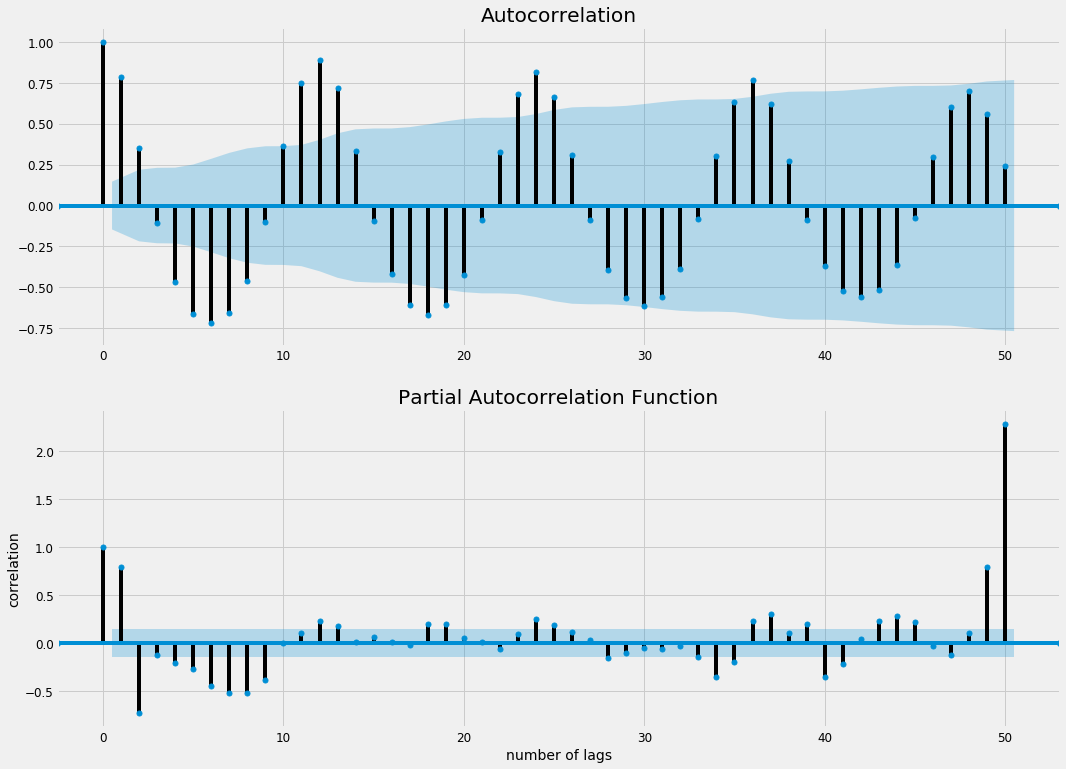

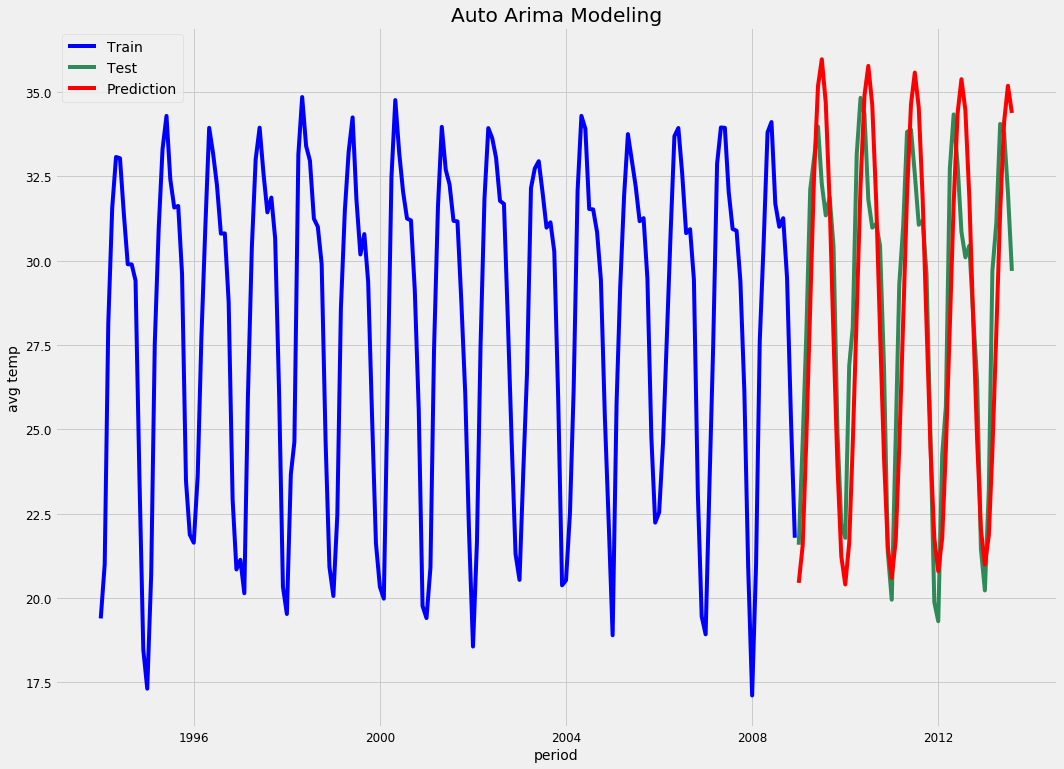

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

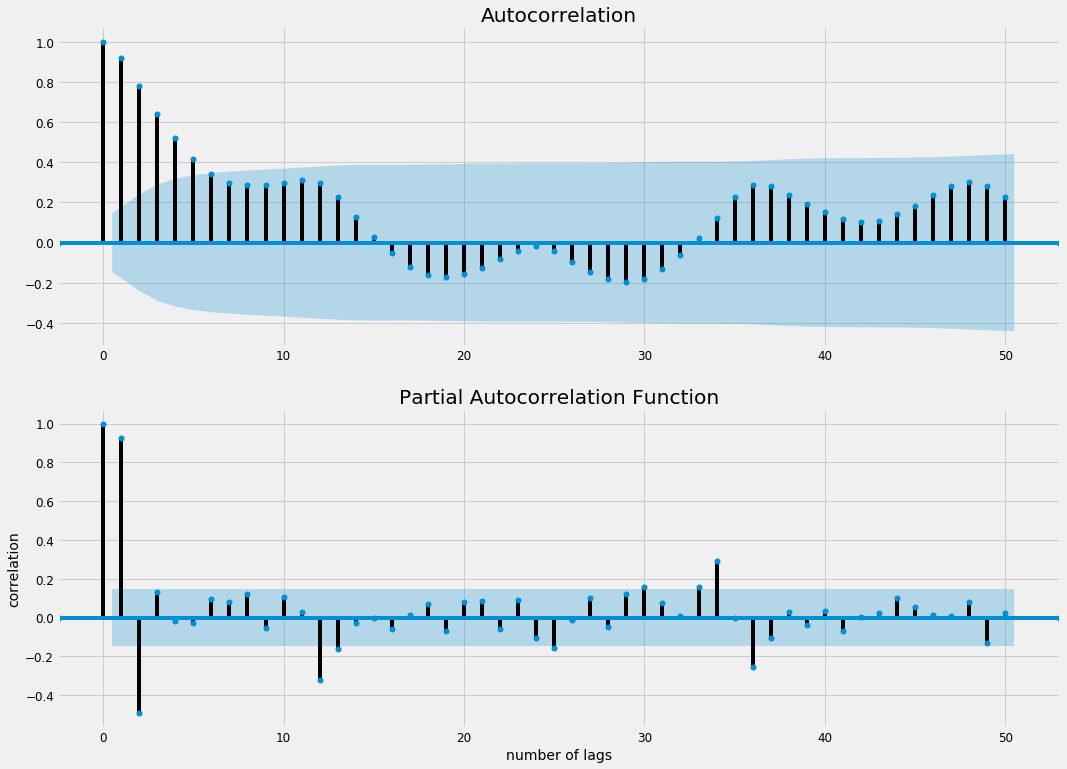

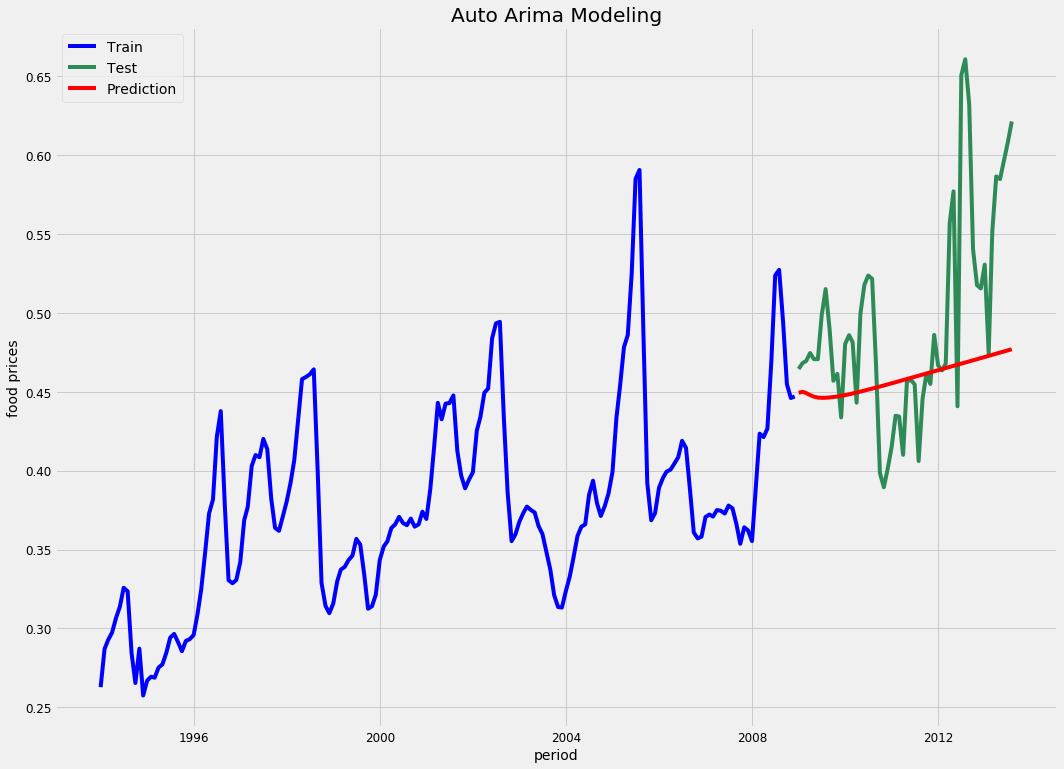

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

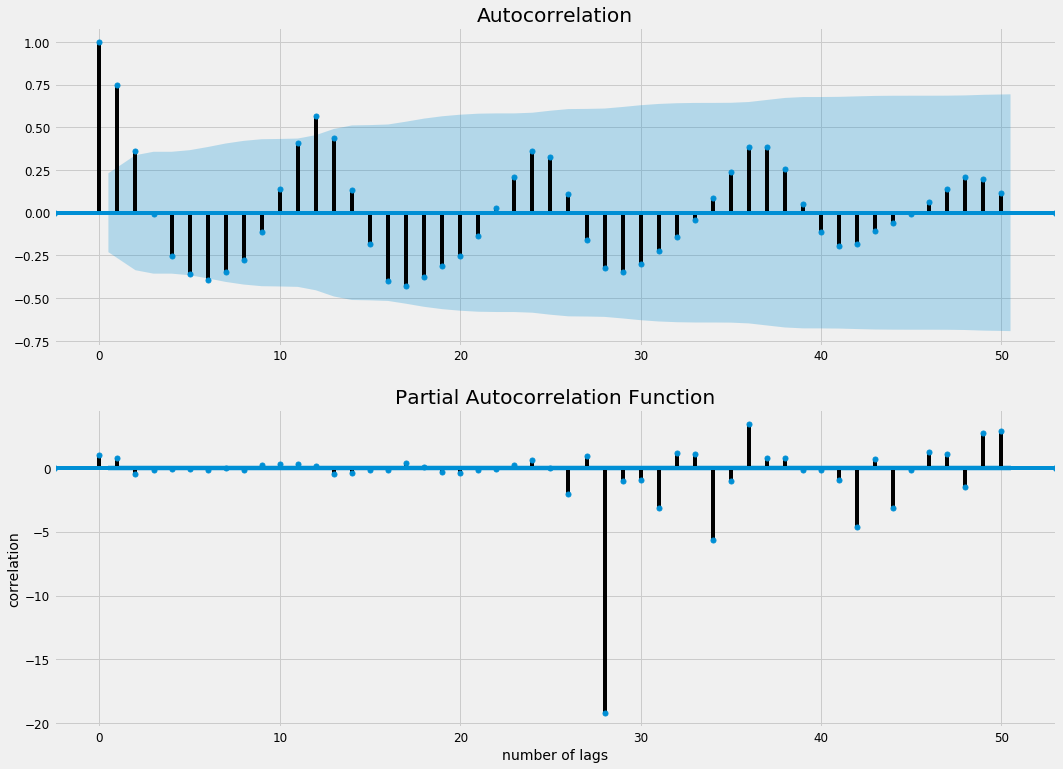

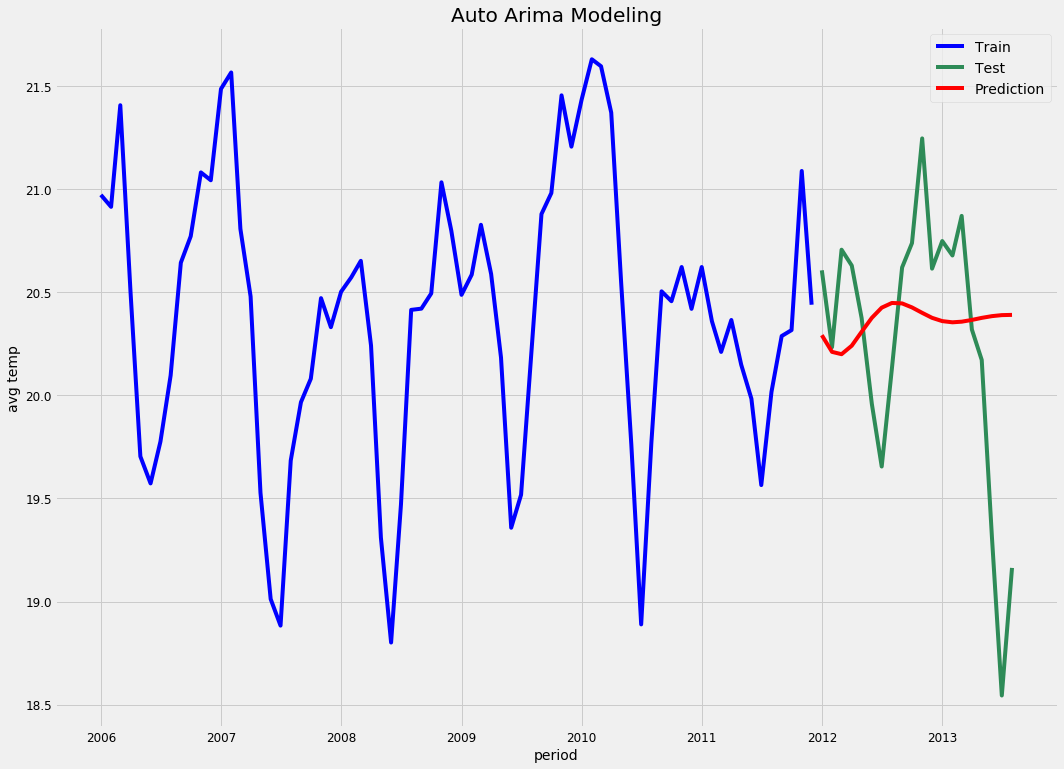

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

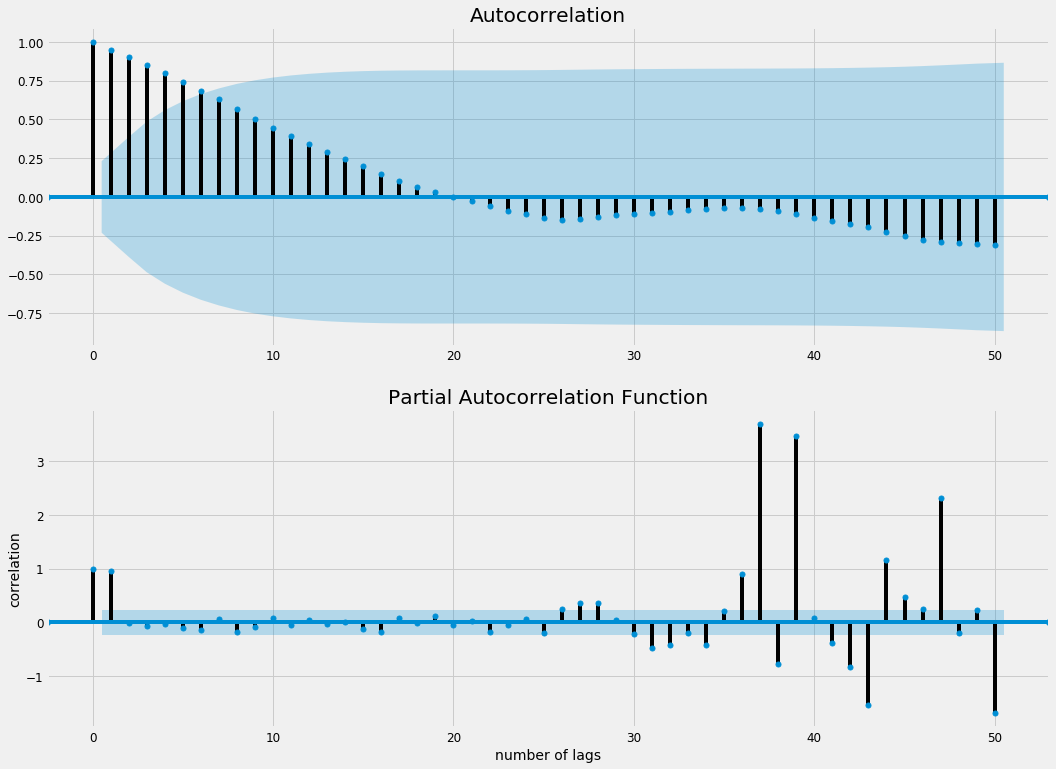

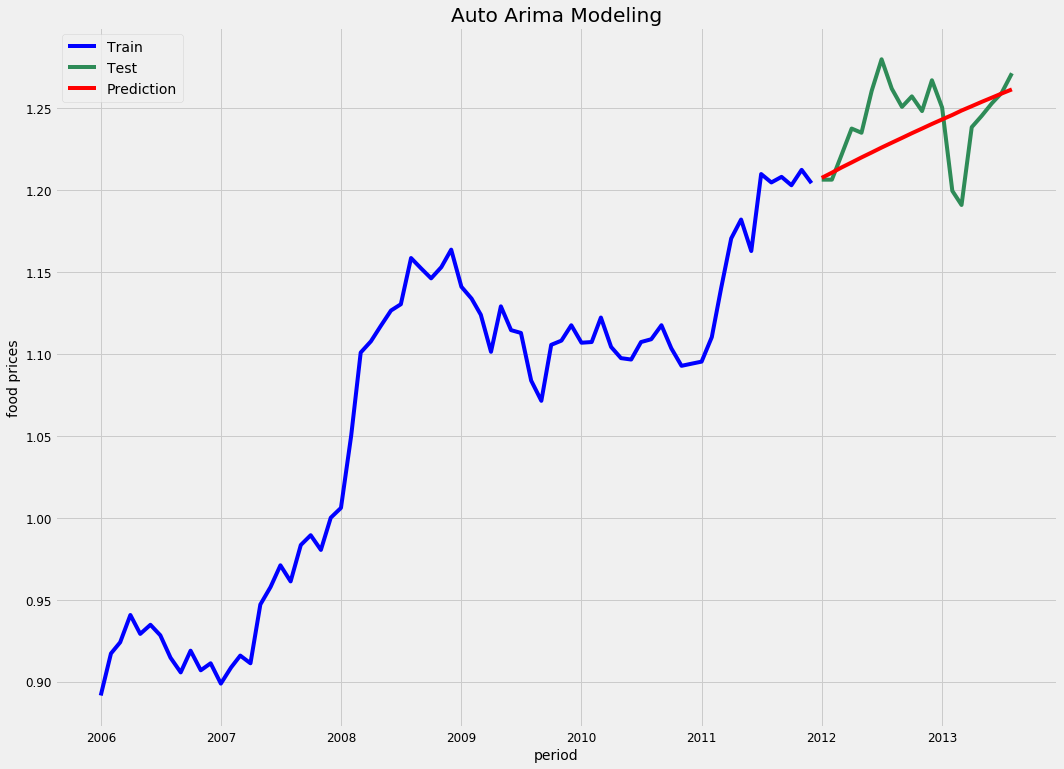

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

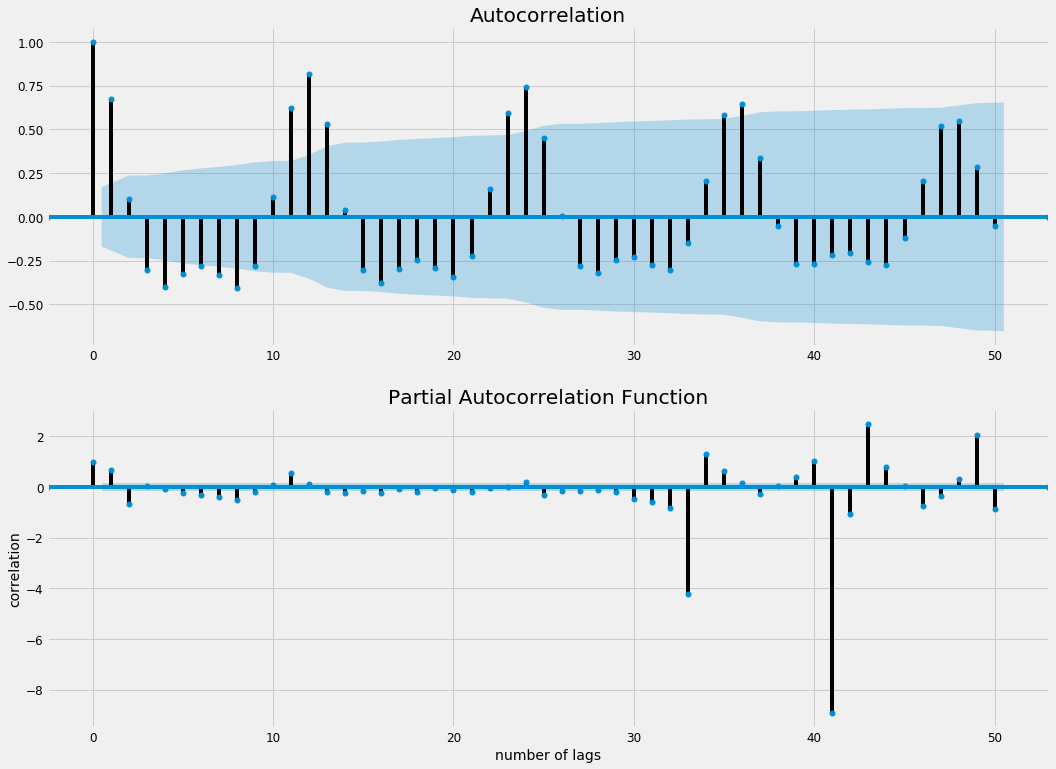

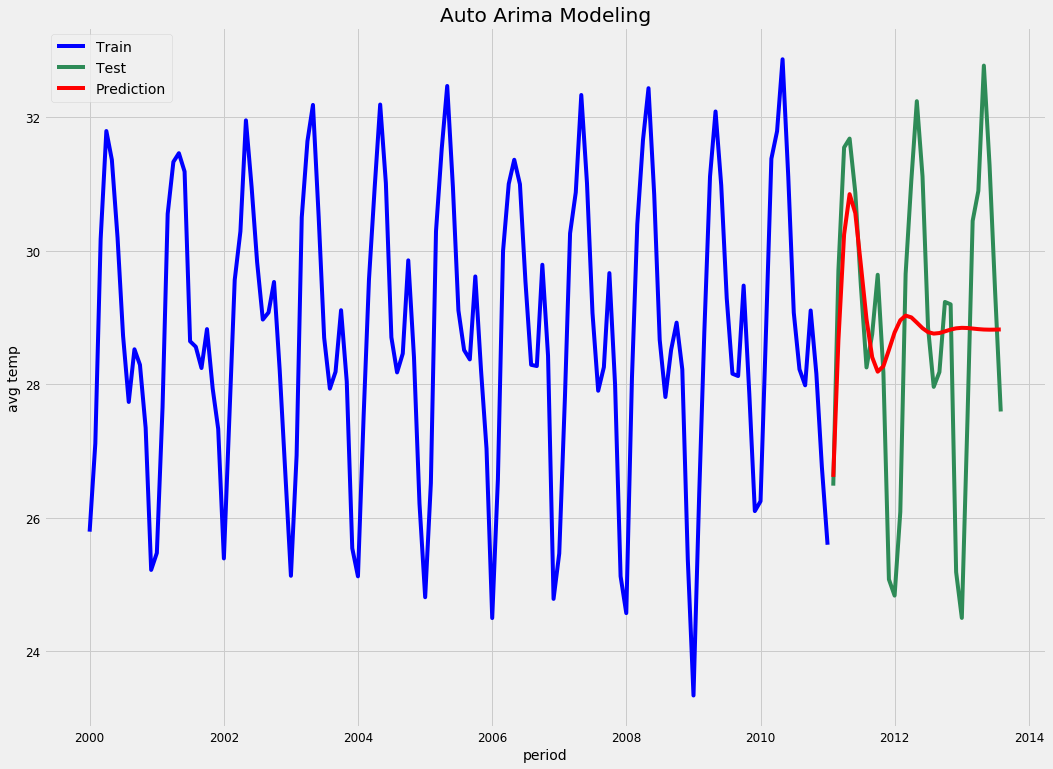

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

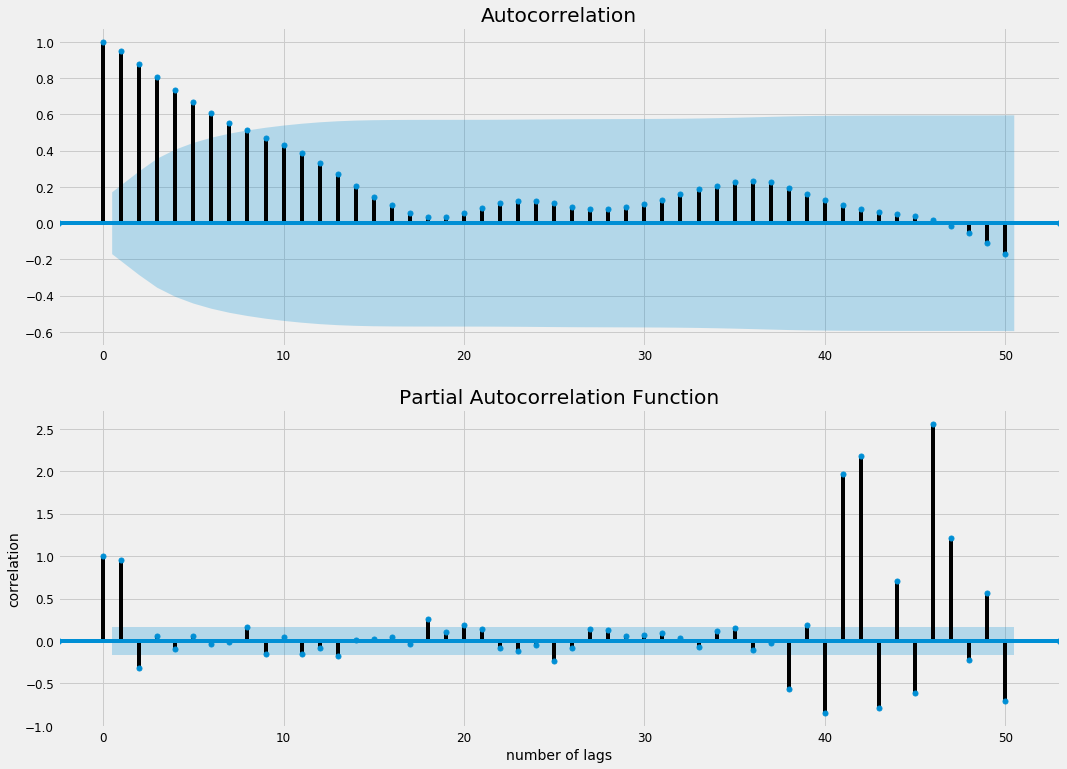

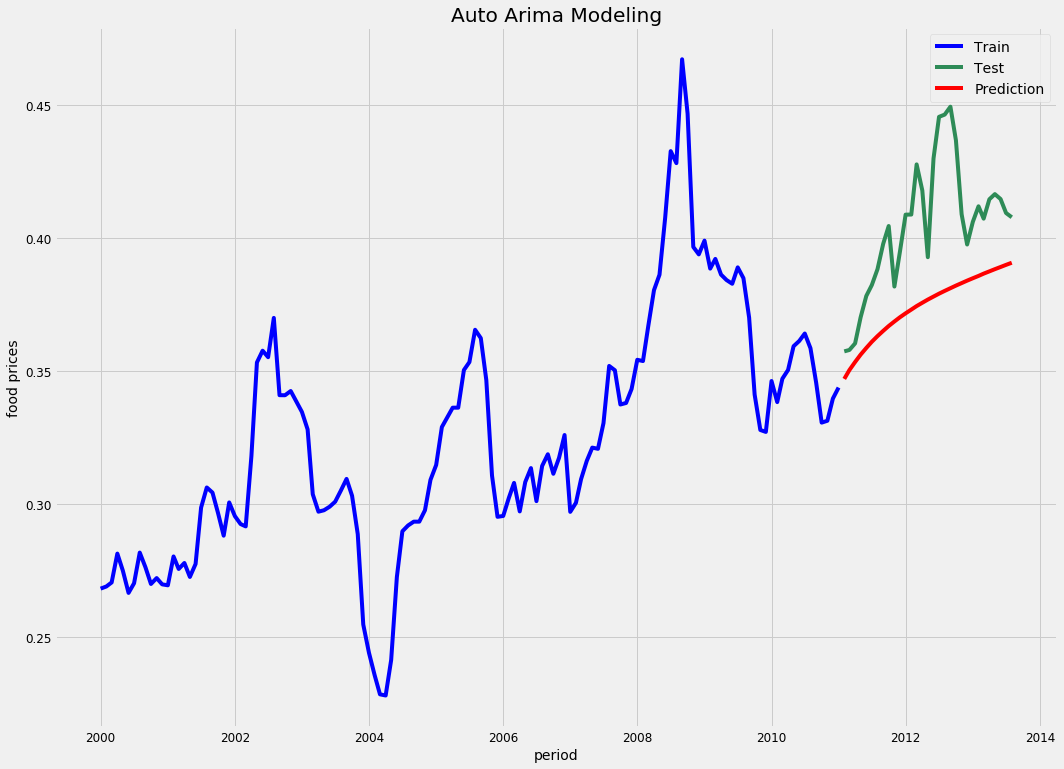

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

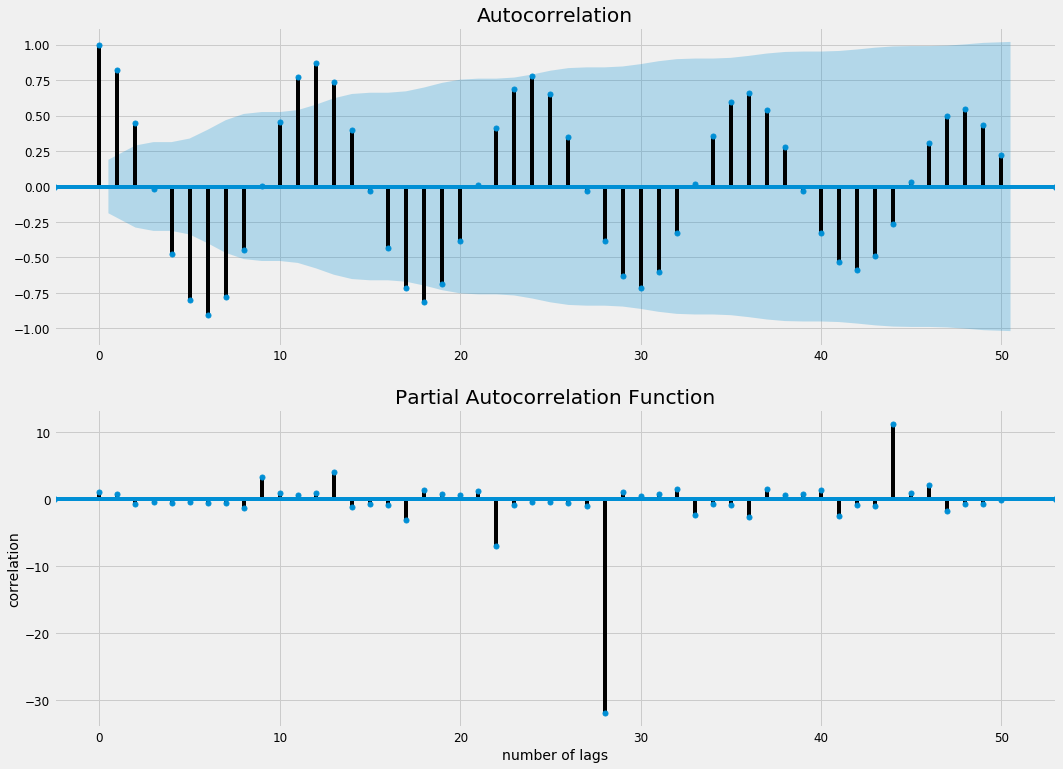

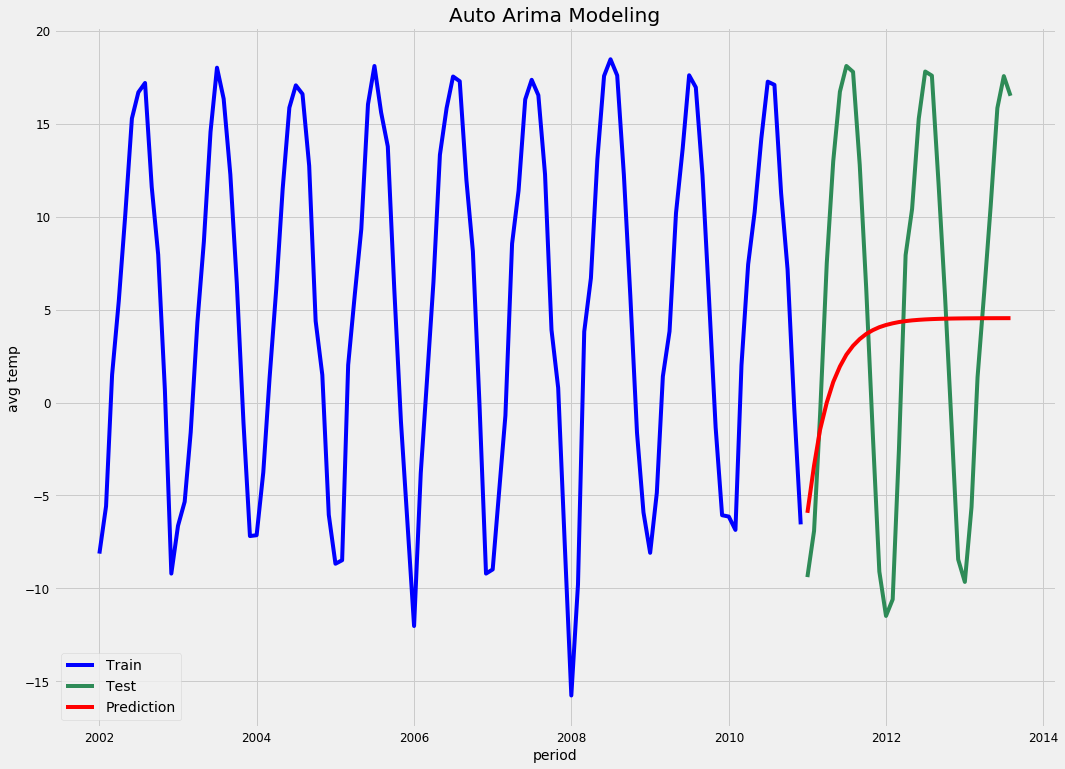

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

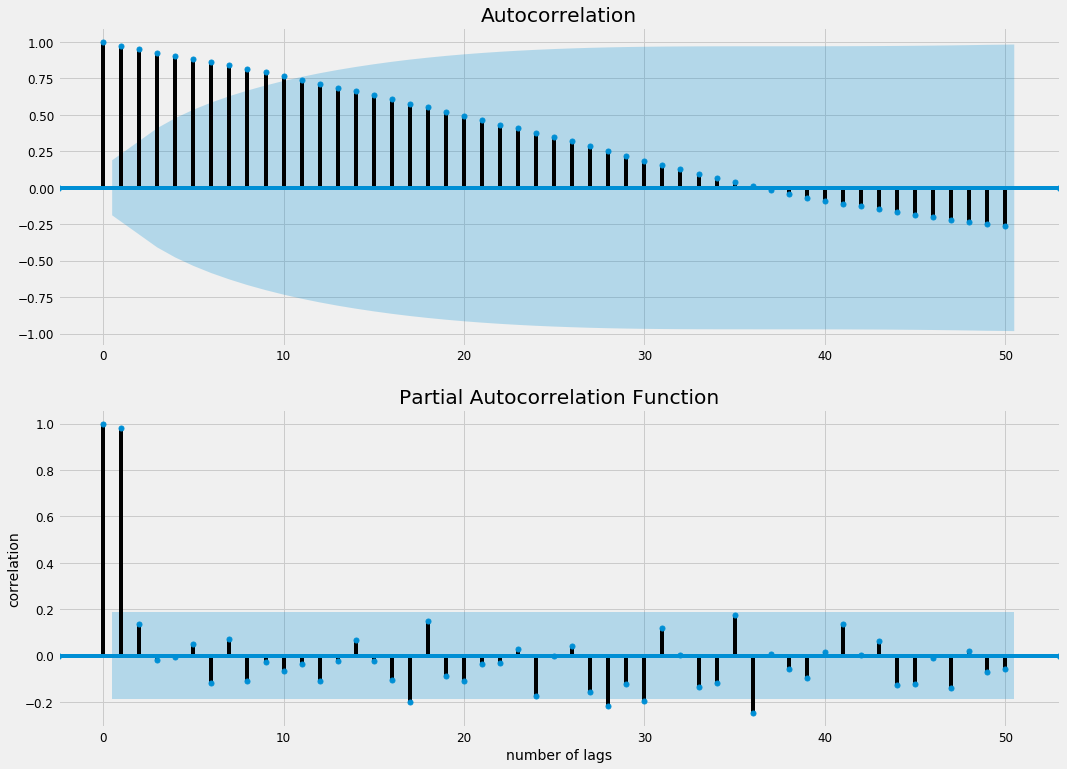

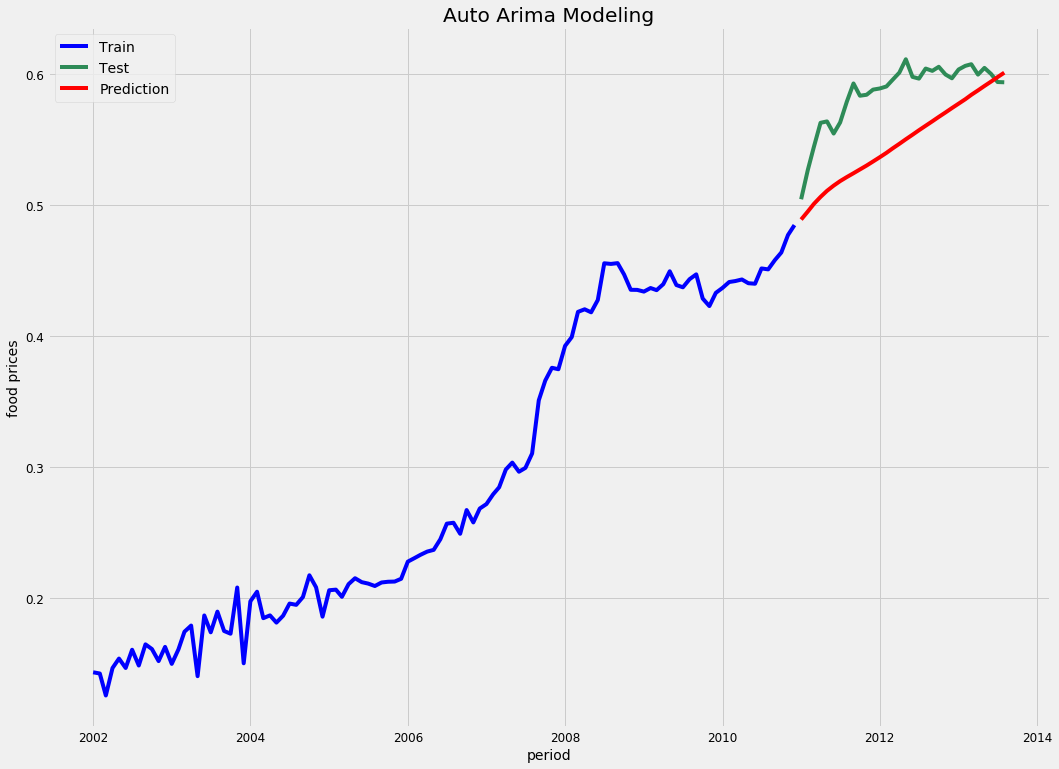

In [14]:
for key, value in country_dict.items():
    df_country = pd.read_csv('.\countries\country_df_'+ value +'.csv')
    df_country.sort_values(by='period')
    df_country['period'] = pd.to_datetime(df_country.period, format='%Y-%m-%d')
    drop_cols = ['country_id', 'country', 'commodity_purchased']
    df_country.drop(drop_cols, axis=1, inplace=True)
    print('='*70, file=text_file1)
    print(str(value), file=text_file1)
    print('='*70, file=text_file1)
    print('='*70)
    print(str(value))
    print('='*70)
    auto_arima_temp(df_country, value)
    auto_arima_prices(df_country, value)